In [1]:
library(DESeq2)
library(RColorBrewer)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

In [2]:
library(reshape2)


In [3]:
library("gplots")



Attaching package: ‘gplots’


The following object is masked from ‘package:IRanges’:

    space


The following object is masked from ‘package:S4Vectors’:

    space


The following object is masked from ‘package:stats’:

    lowess




In [4]:
library(readxl)
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()      masks matrixStats::count()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::first()      masks S4Vectors::first()
✖ dplyr::lag()        masks stats::lag()
✖ ggplot2::Position() masks BiocGenerics::Position(), base::Position()
✖ purrr::red

In [5]:
library("pheatmap")
library("RColorBrewer")

In [6]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [7]:
HCOLOR = '#E26A2C'
HCOLOR_light = '#FDA65D'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'
PRO_COLOR = 'MediumSeaGreen'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

tpal = brewer.pal(5, "Purples")
gpal = brewer.pal(4, 'Dark2')
ann_colors = list(
    Timepoint = c('1'=tpal[1], '2'=tpal[2], '3'=tpal[3], 
                  '4'=tpal[4], '5'=tpal[5]),
    Group = c(P =PCOLOR_light, C = PRO_COLOR)
)


In [8]:
list.files()

[1] "AltTOM-block.1.RData"                         
 [2] "AltTOM-block.2.RData"                         
 [3] "CC1A3 cluster genes.ipynb"                    
 [4] "CC1A3 MOFA.ipynb"                             
 [5] "CC1A3 netcomi.ipynb"                          
 [6] "CC1A3 RNASEQ 1A3 DESeq ref vs longterm.ipynb" 
 [7] "CC1A3 RNASEQ 1A3 DESeq.ipynb"                 
 [8] "CC1A3 RNASEQ 1A3 notebook1.ipynb"             
 [9] "CC1A3 RNASEQ 1A3 run_edger.ipynb"             
[10] "CC1A3 RNASEQ HOT1A3 venn diagrams.ipynb"      
[11] "CC1A3 RNASEQ MED4 DESeq ref vs longterm.ipynb"
[12] "CC1A3 RNASEQ MED4 DESeq.ipynb"                
[13] "CC1A3 RNASEQ MED4 no c1c run_edger.ipynb"     
[14] "CC1A3 RNASEQ med4 notebook1.ipynb"            
[15] "CC1A3 RNASEQ MED4 run_edger.ipynb"            
[16] "CC1A3 RNASEQ MED4 venn diagrams.ipynb"        
[17] "CC1A3 WGCNA CC.ipynb"                         
[18] "CC1A3 WGCNA Conly.ipynb"                      
[19] "CC1A3 WGCNA.ipynb"                            
[20] "CC1A3_RNASEQ_metadata.xlsx"                   
[21] "DE cluster correlate.ipynb"                   
[22] "DE_results"                                   
[23] "femaleMouseTOM-block.1.RData"                 
[24] "gen tx files.ipynb"                           
[25] "gene_db_try"                                  
[26] "HOT1A3_counts_combined.txt"                   
[27] "HOT1A3_counts_header.txt"                     
[28] "HOT1A3_counts.txt"                            
[29] "HOT1A3_DE_genes_DESEQ_wKEGG.csv"              
[30] "HOT1A3_FC_biocyc."                            
[31] "HOT1A3_GOSEQ_results.csv"                     
[32] "HOT1A3_txdb.sqlite"                           
[33] "htseq_HOT1A3.log"                             
[34] "htseq_MED4.log"                               
[35] "mapping"                                      
[36] "mapping.txt"                                  
[37] "MED4_counts_combined.txt"                     
[38] "MED4_counts_header.txt"                       
[39] "MED4_counts.txt"                              
[40] "MED4_DE_genes_DESEQ_wKEGG.csv"                
[41] "MED4_GOSEQ_results.csv"                       
[42] "no_rrna"                                      
[43] "ProTOM-block.1.RData"                         
[44] "README.txt"                                   
[45] "reports"                                      
[46] "rrna_removal_multiqc_report_data"             
[47] "rrna_removal_multiqc_report.html"             
[48] "samples.list"                                 
[49] "trimmomatic"                                  
[50] "trimmomatic_with_quality"                     
[51] "VennDiagram.2022-05-17_20-19-20.log"          
[52] "VennDiagram.2022-05-17_20-19-32.log"          
[53] "VennDiagram.2022-05-17_20-25-51.log"          
[54] "VennDiagram.2022-05-17_20-28-20.log"          
[55] "VennDiagram.2022-05-17_20-32-31.log"          
[56] "VennDiagram.2022-05-17_20-32-43.log"

In [9]:
fname_counts = 'MED4_counts_combined.txt'

In [10]:
cdf = read.csv(fname_counts, sep='\t' )

In [11]:
rownames(cdf) = cdf$gene_id

In [12]:
md = read_excel('CC1A3_RNASEQ_metadata.xlsx')

In [13]:
names(md)

[1] "sample_id"               "TGCnew#"                
 [3] "sample"                  "Conc.Qubit TGC [ng/ul]" 
 [5] "starting input RNA (ng)" "Lib_conc [ng/ul]"       
 [7] "Group"                   "Timepoint"              
 [9] "Replicate"               "Day"                    
[11] "extraction"              "techincal_replicate"

In [14]:
md = md %>% rename('init_RNA' = 'starting input RNA (ng)')

In [15]:
md = md %>% mutate(phase = factor(recode(Timepoint, 
                                  '1' = 'logExp', 
                                  '2' = 'decline' , 
                                  '3' = 'long-term' ,
                                  '4' = 'long-term' ,
                                  '5' = 'long-term' ,
                                         .default = 'NA'
                                 ), levels=c('logExp', 'decline', 'long-term', 'NA')))

In [16]:
group <- paste0(md$Group, md$Timepoint)
group
md$groupandtime = group

[1] "A1"       "A1"       "A1"       "A2"       "A2"       "A2"      
 [7] "A3"       "A3"       "A3"       "C1"       "C1"       "C1"      
[13] "C2"       "C2"       "C2"       "C2"       "C2"       "C3"      
[19] "C3"       "C3"       "C3"       "C3"       "C4"       "C4"      
[25] "C4"       "C5"       "C5"       "C5"       "MockMock" "P1"      
[31] "P1"       "P1"       "P2"       "P2"       "P2"

In [17]:
md = md %>% mutate(treatment = factor(recode(groupandtime, 
                                  'P1' = 'ref', 
                                  'C1' = 'ref' , 
                                  'C3' = 'long-term' ,
                                  'C4' = 'long-term' ,
                                  'C5' = 'long-term' ,
                                         .default = 'NA'
                                 ), levels=c('ref', 'long-term', 'NA')))

In [18]:
head(md)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime,treatment
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>
A1A_S7,7,A1A,168.0,100,0.888,A,1,A,11,1,0,logExp,A1,NA
A1B_S8,8,A1B,99.8,100,0.850,A,1,B,11,1,0,logExp,A1,NA
A1C_S9,9,A1C,57.3,100,1.570,A,1,C,11,1,0,logExp,A1,NA
A2A_S10,10,A2A,69.0,100,0.592,A,2,A,18,2,0,decline,A2,NA
A2B_S11,11,A2B,41.9,100,0.570,A,2,B,18,2,0,decline,A2,NA
A2C_S12,12,A2C,67.2,100,0.980,A,2,C,18,4,0,decline,A2,NA


In [19]:
md$Group = factor(md$Group, levels = c('P', 'C', 'A', 'Mock'))


In [20]:
head(cdf)

,gene_id,gene,product,protein_id,old_locus_tag,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,⋯,C5A_S32,C5B_S33,C5C_S34,Mock_S35,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TX50_RS00020,TX50_RS00020,dnaN,DNA polymerase III subunit beta,WP_011131639.1,NA,0,0,0,1,0,⋯,1303,591,765,0,3076,3135,2995,2956,4869,4302
TX50_RS00025,TX50_RS00025,,hypothetical protein,WP_011131640.1,NA,2,2,0,0,0,⋯,85,23,66,2,427,310,491,111,198,191
TX50_RS00030,TX50_RS00030,purL,phosphoribosylformylglycinamidine synthase subunit PurL,WP_011131641.1,NA,0,4,3,3,3,⋯,513,328,518,0,1162,1365,1266,1878,3482,3459
TX50_RS00035,TX50_RS00035,purF,amidophosphoribosyltransferase,WP_011131642.1,NA,0,1,1,0,0,⋯,238,115,209,0,914,1196,1035,516,1070,1166
TX50_RS00040,TX50_RS00040,,DNA topoisomerase 4 subunit A,WP_011131643.1,NA,0,8,0,2,5,⋯,491,218,354,0,1761,2014,1799,1399,1297,1216
TX50_RS00045,TX50_RS00045,,tetratricopeptide repeat protein,WP_011131644.1,NA,0,0,0,0,0,⋯,80,33,55,0,273,200,305,250,517,345


In [21]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [22]:
head(md)
head(counts)
head(genes)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime,treatment
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>
A1A_S7,7,A1A,168.0,100,0.888,A,1,A,11,1,0,logExp,A1,NA
A1B_S8,8,A1B,99.8,100,0.850,A,1,B,11,1,0,logExp,A1,NA
A1C_S9,9,A1C,57.3,100,1.570,A,1,C,11,1,0,logExp,A1,NA
A2A_S10,10,A2A,69.0,100,0.592,A,2,A,18,2,0,decline,A2,NA
A2B_S11,11,A2B,41.9,100,0.570,A,2,B,18,2,0,decline,A2,NA
A2C_S12,12,A2C,67.2,100,0.980,A,2,C,18,4,0,decline,A2,NA


,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,A2C_S12,A3A_S13,A3B_S14,A3C_S15,C1A_S16,⋯,C5A_S32,C5B_S33,C5C_S34,Mock_S35,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TX50_RS00020,0,0,0,1,0,4,0,0,0,1119,⋯,1303,591,765,0,3076,3135,2995,2956,4869,4302
TX50_RS00025,2,2,0,0,0,0,0,0,0,127,⋯,85,23,66,2,427,310,491,111,198,191
TX50_RS00030,0,4,3,3,3,4,2,0,5,359,⋯,513,328,518,0,1162,1365,1266,1878,3482,3459
TX50_RS00035,0,1,1,0,0,4,0,0,0,326,⋯,238,115,209,0,914,1196,1035,516,1070,1166
TX50_RS00040,0,8,0,2,5,0,4,7,0,600,⋯,491,218,354,0,1761,2014,1799,1399,1297,1216
TX50_RS00045,0,0,0,0,0,3,1,0,0,113,⋯,80,33,55,0,273,200,305,250,517,345


,gene_id,gene,product,protein_id,old_locus_tag
,<chr>,<chr>,<chr>,<chr>,<lgl>
TX50_RS00020,TX50_RS00020,dnaN,DNA polymerase III subunit beta,WP_011131639.1,NA
TX50_RS00025,TX50_RS00025,,hypothetical protein,WP_011131640.1,NA
TX50_RS00030,TX50_RS00030,purL,phosphoribosylformylglycinamidine synthase subunit PurL,WP_011131641.1,NA
TX50_RS00035,TX50_RS00035,purF,amidophosphoribosyltransferase,WP_011131642.1,NA
TX50_RS00040,TX50_RS00040,,DNA topoisomerase 4 subunit A,WP_011131643.1,NA
TX50_RS00045,TX50_RS00045,,tetratricopeptide repeat protein,WP_011131644.1,NA


In [23]:
table(md$sample_id == names(counts))


TRUE 
  35 

# Remove the 60ng technical replicate and non P ,C samples

In [24]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [25]:
# remove last 5 lines that are not genes
counts = head(counts, -5)
genes = head(genes, -5)

In [26]:
md_noalt = filter(md, Group %in% c('P', 'C'), techincal_replicate %in% 0)


In [27]:
counts_no_alt = select(counts, md_noalt$sample_id)

In [28]:
table(md_noalt$sample_id == names(counts_no_alt))


TRUE 
  21 

In [29]:
cts = counts_no_alt
coldata= md_noalt


In [30]:
head(coldata)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime,treatment
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>
C1A_S16,16,C1A,300.0,100,1.15,C,1,A,11,1,0,logExp,C1,ref
C1B_S17,17,C1B,84.9,100,1.91,C,1,B,11,1,0,logExp,C1,ref
C1C_S18,18,C1C,56.5,100,2.24,C,1,C,11,2,0,logExp,C1,ref
C2A_60ng_S19,19,C2A,6.3,60,1.87,C,2,A,18,4,0,decline,C2,NA
C2B_100ng_S20,20,C2B_1,31.1,100,2.28,C,2,B,18,2,0,decline,C2,NA
C2C_100ng_S22,22,C2C_1,15.7,100,2.80,C,2,C,18,2,0,decline,C2,NA


In [31]:
head(cts)

,C1A_S16,C1B_S17,C1C_S18,C2A_60ng_S19,C2B_100ng_S20,C2C_100ng_S22,C3A_100ng_S24,C3B_60ng_S26,C3C_100ng_S27,C4A_S29,⋯,C4C_S31,C5A_S32,C5B_S33,C5C_S34,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TX50_RS00020,1119,2394,5314,613,2227,3769,355,2220,1046,1384,⋯,1526,1303,591,765,3076,3135,2995,2956,4869,4302
TX50_RS00025,127,331,450,93,141,268,26,106,29,86,⋯,93,85,23,66,427,310,491,111,198,191
TX50_RS00030,359,907,1796,238,542,1061,239,961,471,671,⋯,1169,513,328,518,1162,1365,1266,1878,3482,3459
TX50_RS00035,326,767,540,181,385,692,102,492,150,328,⋯,404,238,115,209,914,1196,1035,516,1070,1166
TX50_RS00040,600,1572,2758,408,1242,1833,182,745,313,621,⋯,689,491,218,354,1761,2014,1799,1399,1297,1216
TX50_RS00045,113,212,538,111,150,249,17,221,69,134,⋯,79,80,33,55,273,200,305,250,517,345


In [32]:
coldata$groupandtime = factor(coldata$groupandtime, levels=c("P1", "P2","C1", "C2", "C3", "C4", "C5"))
coldata$Group = factor(coldata$Group, levels=c("P", "C"))
coldata$Timepoint = factor(coldata$Timepoint, levels=c(1,2,3,4,5))
coldata$extraction = factor(coldata$extraction)


In [33]:
colnames(cts) = coldata$sample
rownames(coldata) = coldata$sample


Warning message:
“Setting row names on a tibble is deprecated.”


In [34]:
dput(unique(coldata$groupandtime))
dput(unique(coldata$Group))

structure(c(3L, 4L, 5L, 6L, 7L, 1L, 2L), levels = c("P1", "P2", 
"C1", "C2", "C3", "C4", "C5"), class = "factor")
structure(2:1, levels = c("P", "C"), class = "factor")


In [35]:
rownames(coldata) = coldata$sample



Warning message:
“Setting row names on a tibble is deprecated.”


In [36]:
rownames(coldata)

[1] "C1A"   "C1B"   "C1C"   "C2A"   "C2B_1" "C2C_1" "C3A_1" "C3B"   "C3C_1"
[10] "C4A"   "C4B"   "C4C"   "C5A"   "C5B"   "C5C"   "P1A"   "P1B"   "P1C"  
[19] "P2A"   "P2B"   "P2C"

In [37]:
all(rownames(coldata) == colnames(cts))

[1] TRUE

In [38]:
design = model.matrix(~ 0+ extraction + groupandtime, data = coldata)

In [39]:
design

,extraction1,extraction2,extraction3,extraction4,extraction5,extraction6,extraction7,groupandtimeP2,groupandtimeC1,groupandtimeC2,groupandtimeC3,groupandtimeC4,groupandtimeC5
C1A,1,0,0,0,0,0,0,0,1,0,0,0,0
C1B,1,0,0,0,0,0,0,0,1,0,0,0,0
C1C,0,1,0,0,0,0,0,0,1,0,0,0,0
C2A,0,0,0,1,0,0,0,0,0,1,0,0,0
C2B_1,0,1,0,0,0,0,0,0,0,1,0,0,0
C2C_1,0,1,0,0,0,0,0,0,0,1,0,0,0
C3A_1,0,0,0,1,0,0,0,0,0,0,1,0,0
C3B,0,0,0,0,1,0,0,0,0,0,1,0,0
C3C_1,0,0,0,1,0,0,0,0,0,0,1,0,0
C4A,0,0,0,0,1,0,0,0,0,0,0,1,0


In [40]:
design = subset(design, select=-c(extraction7))

In [41]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design= ~groupandtime)

In [42]:
mcols(dds) <- DataFrame(mcols(dds), genes)
mcols(dds)

DataFrame with 1865 rows and 5 columns
                  gene_id        gene                product     protein_id
              <character> <character>            <character>    <character>
TX50_RS00020 TX50_RS00020        dnaN DNA polymerase III s.. WP_011131639.1
TX50_RS00025 TX50_RS00025               hypothetical protein WP_011131640.1
TX50_RS00030 TX50_RS00030        purL phosphoribosylformyl.. WP_011131641.1
TX50_RS00035 TX50_RS00035        purF amidophosphoribosylt.. WP_011131642.1
TX50_RS00040 TX50_RS00040             DNA topoisomerase 4 .. WP_011131643.1
...                   ...         ...                    ...            ...
TX50_RS09870 TX50_RS09870               hypothetical protein WP_225866747.1
TX50_RS09875 TX50_RS09875               hypothetical protein WP_225866749.1
TX50_RS09880 TX50_RS09880             SxtJ family membrane.. WP_011132879.1
TX50_RS09885 TX50_RS09885             DUF5989 family protein WP_225866752.1
TX50_RS09890 TX50_RS09890               hypotheti

In [43]:
dds

class: DESeqDataSet 
dim: 1865 21 
metadata(1): version
assays(1): counts
rownames(1865): TX50_RS00020 TX50_RS00025 ... TX50_RS09885 TX50_RS09890
rowData names(5): gene_id gene product protein_id old_locus_tag
colnames(21): C1A C1B ... P2B P2C
colData names(15): sample_id TGCnew# ... groupandtime treatment

In [44]:
keep <- rowSums(counts(dds)) >= 10
table(keep)
dds <- dds[keep,]

keep
FALSE  TRUE 
   10  1855 

In [45]:
names(colData(dds))

[1] "sample_id"              "TGCnew#"                "sample"                
 [4] "Conc.Qubit TGC [ng/ul]" "init_RNA"               "Lib_conc [ng/ul]"      
 [7] "Group"                  "Timepoint"              "Replicate"             
[10] "Day"                    "extraction"             "techincal_replicate"   
[13] "phase"                  "groupandtime"           "treatment"

In [46]:
dds$groupandtime = factor(dds$groupandtime, levels=c("P1", "P2","C1", "C2", "C3", "C4", "C5"))
dds$Group = factor(dds$Group, levels=c("P", "C"))
dds$Timepoint = factor(dds$Timepoint, levels=c(1,2,3,4,5))
dds$extraction = factor(dds$extraction)


In [47]:
vsd <- vst(dds, blind = FALSE)
head(assay(vsd), 3)

,C1A,C1B,C1C,C2A,C2B_1,C2C_1,C3A_1,C3B,C3C_1,C4A,⋯,C4C,C5A,C5B,C5C,P1A,P1B,P1C,P2A,P2B,P2C
TX50_RS00020,10.199306,10.13861,11.552435,10.233089,10.846940,10.968598,10.277762,10.708205,10.925488,10.788772,⋯,10.673880,10.903510,10.828046,10.566447,10.145981,10.133392,9.980252,11.671632,12.075326,12.089237
TX50_RS00025,7.201485,7.40318,8.070099,7.613555,7.034628,7.294078,6.716129,6.561249,6.098862,6.959015,⋯,6.833144,7.123598,6.415651,7.179944,7.415239,6.965448,7.480714,7.102511,7.573653,7.703449
TX50_RS00030,8.599562,8.77112,10.002316,8.897714,8.846223,9.168677,9.715876,9.518070,9.788721,9.758011,⋯,10.293683,9.577001,9.988663,10.011130,8.774283,8.959921,8.768441,11.021224,11.593740,11.775872


In [48]:
head(colData(vsd))

DataFrame with 6 rows and 16 columns
          sample_id   TGCnew#      sample Conc.Qubit TGC [ng/ul]  init_RNA
        <character> <numeric> <character>              <numeric> <numeric>
C1A         C1A_S16        16         C1A                  300.0       100
C1B         C1B_S17        17         C1B                   84.9       100
C1C         C1C_S18        18         C1C                   56.5       100
C2A    C2A_60ng_S19        19         C2A                    6.3        60
C2B_1 C2B_100ng_S20        20       C2B_1                   31.1       100
C2C_1 C2C_100ng_S22        22       C2C_1                   15.7       100
      Lib_conc [ng/ul]    Group Timepoint   Replicate         Day extraction
             <numeric> <factor>  <factor> <character> <character>   <factor>
C1A               1.15        C         1           A          11          1
C1B               1.91        C         1           B          11          1
C1C               2.24        C         1           C  

In [49]:
rld <- rlog(dds, blind = FALSE)
head(assay(rld), 3)

,C1A,C1B,C1C,C2A,C2B_1,C2C_1,C3A_1,C3B,C3C_1,C4A,⋯,C4C,C5A,C5B,C5C,P1A,P1B,P1C,P2A,P2B,P2C
TX50_RS00020,10.291414,10.241683,11.404707,10.31949,10.820574,10.920803,10.356679,10.706605,10.885098,10.772748,⋯,10.678484,10.867058,10.804925,10.590729,10.247575,10.237350,10.113287,11.503846,11.842300,11.853959
TX50_RS00025,7.018175,7.195818,7.774288,7.37244,6.871924,7.100079,6.608066,6.451211,6.063830,6.806327,⋯,6.695153,6.950017,6.354628,6.998547,7.206704,6.809937,7.264091,6.931639,7.342743,7.454666
TX50_RS00030,8.766592,8.904465,9.920469,9.01226,8.967106,9.231050,9.682596,9.519202,9.742882,9.717575,⋯,10.162805,9.568051,9.907885,9.927062,8.906712,9.059080,8.901813,10.773011,11.258060,11.413123


In [50]:
sampleDists <- dist(t(assay(vsd)))
sampleDists

           C1A      C1B      C1C      C2A    C2B_1    C2C_1    C3A_1      C3B
C1B   19.46836                                                               
C1C   51.98906 52.28083                                                      
C2A   38.09352 35.60140 52.36411                                             
C2B_1 31.50918 32.77533 34.68816 31.99933                                    
C2C_1 32.74597 34.05856 31.63673 37.12041 15.99659                           
C3A_1 52.49696 50.66289 51.36069 41.62088 37.65798 38.81939                  
C3B   45.76613 45.44404 44.63521 43.19326 29.65792 27.51400 34.53702         
C3C_1 55.72943 54.94104 48.70558 43.96937 36.90948 37.53843 31.17910 23.94948
C4A   43.87321 43.21658 42.86588 36.56352 27.73864 28.75997 33.69686 21.14918
C4B   44.09764 43.37667 44.12975 37.41189 28.94986 29.20173 33.02842 21.88539
C4C   55.46014 54.47562 49.91577 56.76177 41.09653 38.44773 46.38102 27.23644
C5A   40.85671 39.34807 45.10501 37.07746 29.39482 29.12566 32.3

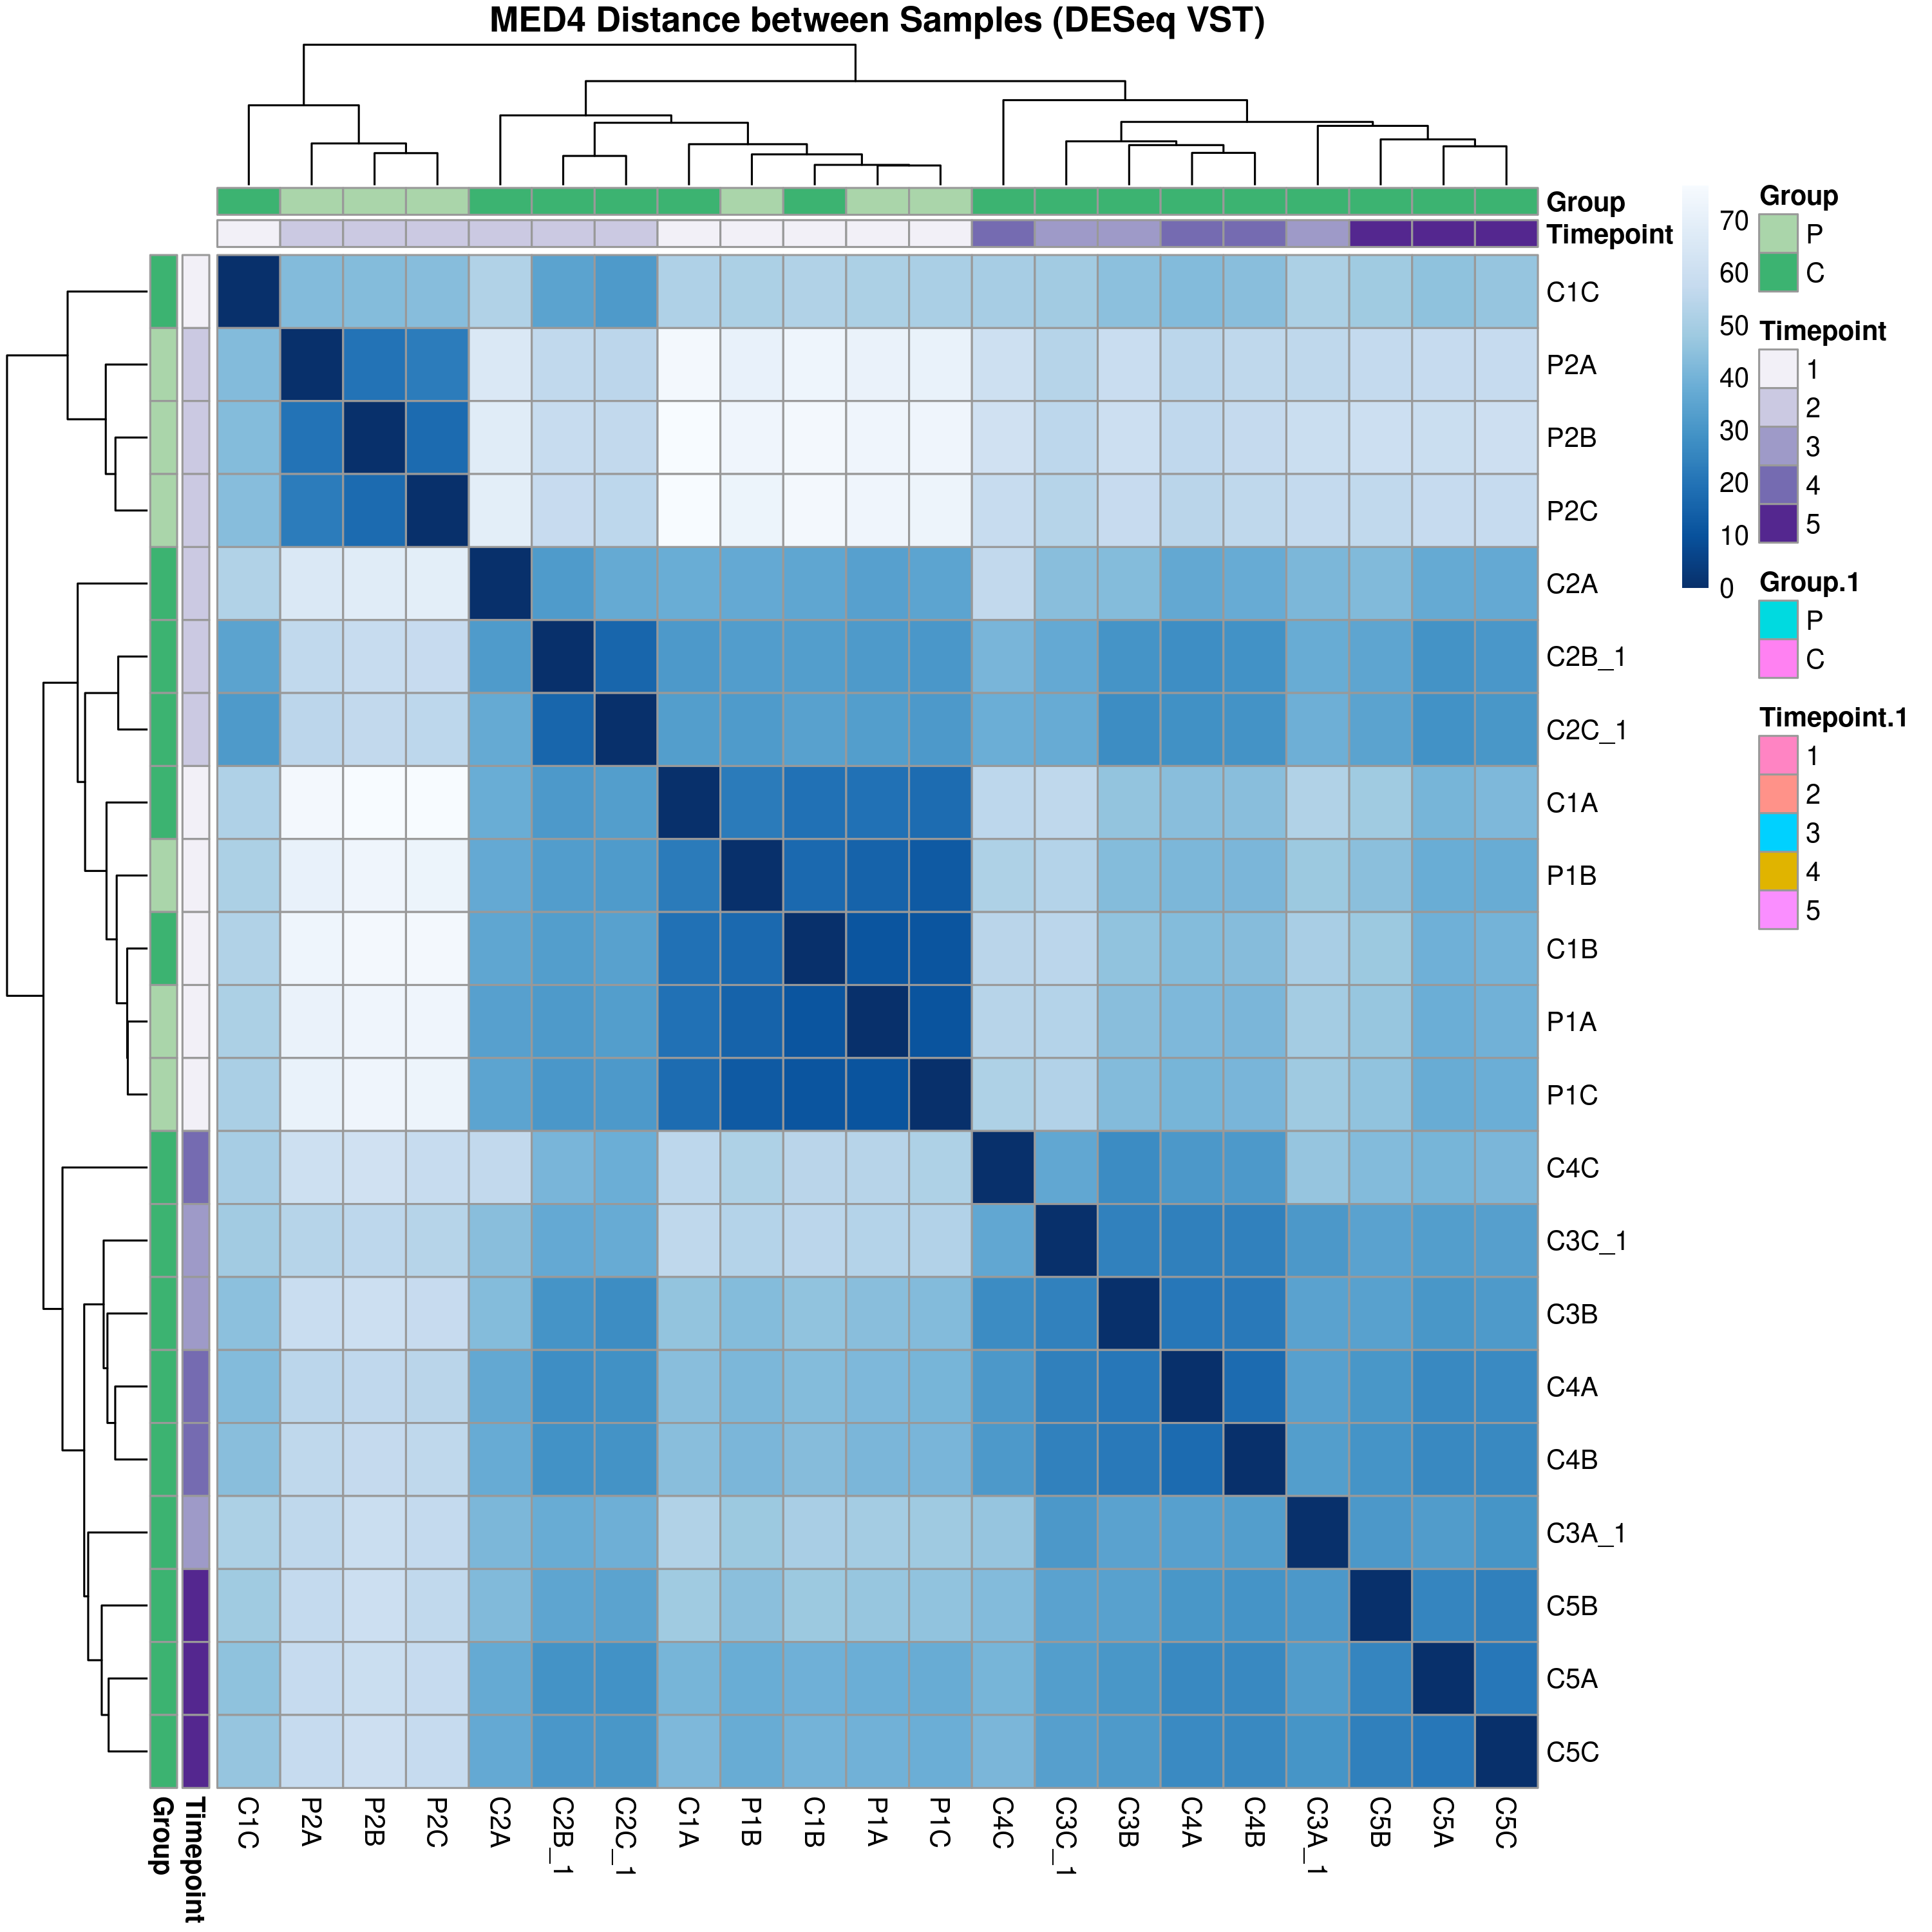

In [51]:
sampleDists <- dist(t(assay(vsd)))
#sampleDists
sampleDistMatrix <- as.matrix( sampleDists )
rownames(sampleDistMatrix) <- vsd$sample
colnames(sampleDistMatrix) <- vsd$sample
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
ann_df = colData(vsd)[c('Timepoint', 'Group')]

pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors,
         annotation_row = ann_df,
         annotation_col = ann_df,
         annotation_colors = ann_colors,
         main = "MED4 Distance between Samples (DESeq VST)"
)

In [52]:
head(sampleDistMatrix)

,C1A,C1B,C1C,C2A,C2B_1,C2C_1,C3A_1,C3B,C3C_1,C4A,⋯,C4C,C5A,C5B,C5C,P1A,P1B,P1C,P2A,P2B,P2C
C1A,0.00000,19.46836,51.98906,38.09352,31.50918,32.74597,52.49696,45.76613,55.72943,43.87321,⋯,55.46014,40.85671,48.55729,42.05597,19.50203,22.38087,17.83851,74.86651,76.60695,76.52296
C1B,19.46836,0.00000,52.28083,35.60140,32.77533,34.05856,50.66289,45.44404,54.94104,43.21658,⋯,54.47562,39.34807,47.65595,40.06212,10.95781,16.83857,11.11359,73.02827,75.01449,74.80467
C1C,51.98906,52.28083,0.00000,52.36411,34.68816,31.63673,51.36069,44.63521,48.70558,42.86588,⋯,49.91577,45.10501,48.39127,46.26894,51.22887,51.36454,50.91109,42.69057,42.97602,43.58227
C2A,38.09352,35.60140,52.36411,0.00000,31.99933,37.12041,41.62088,43.19326,43.96937,36.56352,⋯,56.76177,37.07746,42.61004,36.81057,33.94075,36.68584,34.95817,65.60855,68.15180,68.90213
C2B_1,31.50918,32.77533,34.68816,31.99933,0.00000,15.99659,37.65798,29.65792,36.90948,27.73864,⋯,41.09653,29.39482,35.31360,30.78578,31.61541,32.52228,30.70019,56.18841,58.12415,57.76014
C2C_1,32.74597,34.05856,31.63673,37.12041,15.99659,0.00000,38.81939,27.51400,37.53843,28.75997,⋯,38.44773,29.12566,34.62831,30.56579,32.81155,32.03040,31.51787,55.20182,56.61307,55.32250


In [53]:
m = as.data.frame(sampleDistMatrix)
m$sample1 = rownames(m)
mdist = pivot_longer(m, cols=colnames(sampleDistMatrix), 
            names_to='sample2',
            values_to='dist')
mdist = mdist %>% filter(sample1 != sample2)

In [54]:
mdist = left_join(mdist, colData(dds), 
          by=c('sample1' = 'sample'), suffix=c('', '_1'), copy=TRUE)
mdist = left_join(mdist, colData(dds), 
          by=c('sample2' = 'sample'), suffix=c('', '_2'), copy=TRUE)
head(mdist)


sample1,sample2,dist,sample_id,TGCnew.,Conc.Qubit.TGC..ng.ul.,init_RNA,Lib_conc..ng.ul.,Group,Timepoint,⋯,Lib_conc..ng.ul._2,Group_2,Timepoint_2,Replicate_2,Day_2,extraction_2,techincal_replicate_2,phase_2,groupandtime_2,treatment_2
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<dbl>,<fct>,<fct>,<chr>,<chr>,<fct>,<dbl>,<fct>,<fct>,<fct>
C1A,C1B,19.46836,C1A_S16,16,300,100,1.15,C,1,⋯,1.91,C,1,B,11,1,0,logExp,C1,ref
C1A,C1C,51.98906,C1A_S16,16,300,100,1.15,C,1,⋯,2.24,C,1,C,11,2,0,logExp,C1,ref
C1A,C2A,38.09352,C1A_S16,16,300,100,1.15,C,1,⋯,1.87,C,2,A,18,4,0,decline,C2,NA
C1A,C2B_1,31.50918,C1A_S16,16,300,100,1.15,C,1,⋯,2.28,C,2,B,18,2,0,decline,C2,NA
C1A,C2C_1,32.74597,C1A_S16,16,300,100,1.15,C,1,⋯,2.80,C,2,C,18,2,0,decline,C2,NA
C1A,C3A_1,52.49696,C1A_S16,16,300,100,1.15,C,1,⋯,1.20,C,3,A,31,4,0,long-term,C3,long-term


In [55]:
dput(colnames(mdist))

c("sample1", "sample2", "dist", "sample_id", "TGCnew.", "Conc.Qubit.TGC..ng.ul.", 
"init_RNA", "Lib_conc..ng.ul.", "Group", "Timepoint", "Replicate", 
"Day", "extraction", "techincal_replicate", "phase", "groupandtime", 
"treatment", "sample_id_2", "TGCnew._2", "Conc.Qubit.TGC..ng.ul._2", 
"init_RNA_2", "Lib_conc..ng.ul._2", "Group_2", "Timepoint_2", 
"Replicate_2", "Day_2", "extraction_2", "techincal_replicate_2", 
"phase_2", "groupandtime_2", "treatment_2")


In [56]:
cgroup_levels = c("PP",  "CP", "CC")
cgroup_levels = c("Distance from P to P",  "Distance from C to P", 
                  "Distance from C to C")
ctime_levels = c(
    "11", 
    "21", '22', 
    '31', '32', "33", 
    '41', '42', "43", "44", 
    '51', '52', "53", "54", "55"
)
cself= c('11', '22', '33','44', '55')
mdist = mdist %>% 
   mutate(combgroup = paste('Distance from', Group, 'to', Group_2),
          combtime = paste0(Timepoint, Timepoint_2),
          self = combtime %in% cself
         ) %>%
   rename(Distance_to_timepoint = Timepoint_2 ) %>%
   filter(combgroup %in% cgroup_levels, combtime %in% ctime_levels)
  
dput(unique(mdist$combgroup))
dput(unique(mdist$combtime))

c("Distance from C to C", "Distance from C to P", "Distance from P to P"
)
c("11", "21", "22", "31", "32", "33", "41", "42", "43", "44", 
"51", "52", "53", "54", "55")


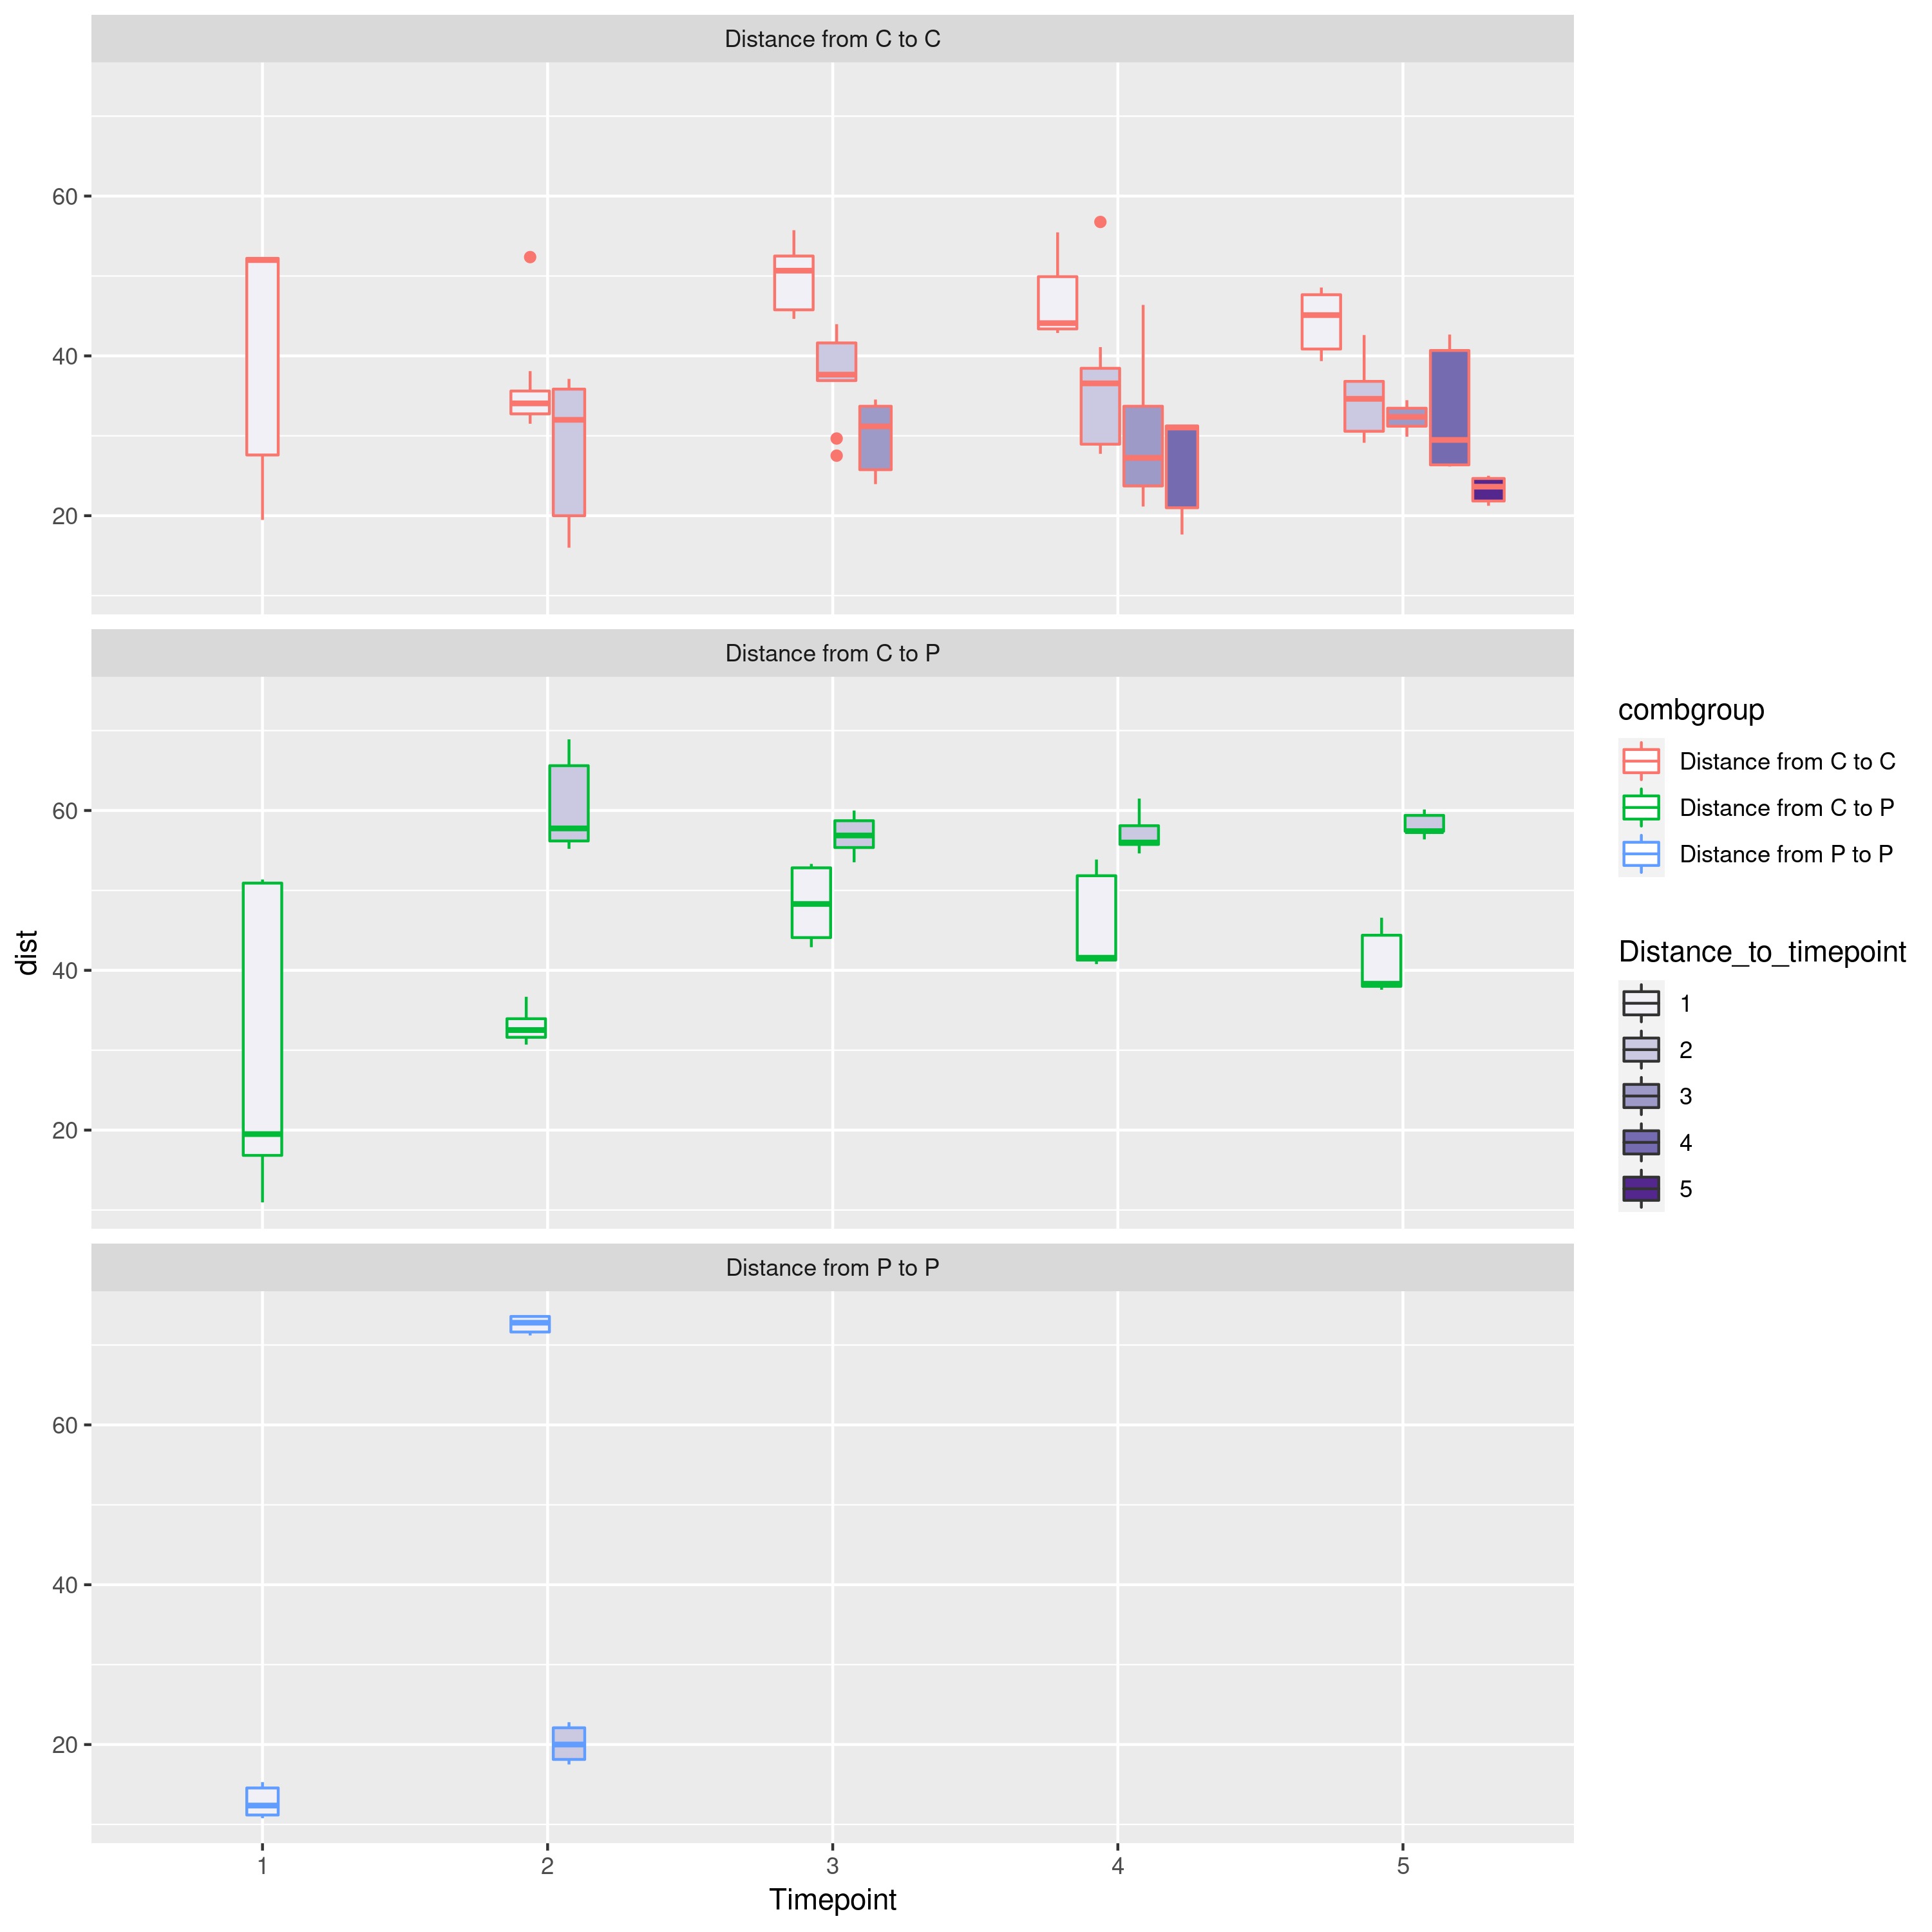

In [57]:
ggplot(mdist, aes(x=Timepoint, y=dist, fill=Distance_to_timepoint, 
                  color=combgroup)) +
   #geom_point() +
   #geom_line(aes(group=Timepoint_2))
   geom_boxplot(varwidth = TRUE) +
   scale_fill_manual(values = ann_colors$Timepoint) +
   facet_wrap(~combgroup, ncol=1)

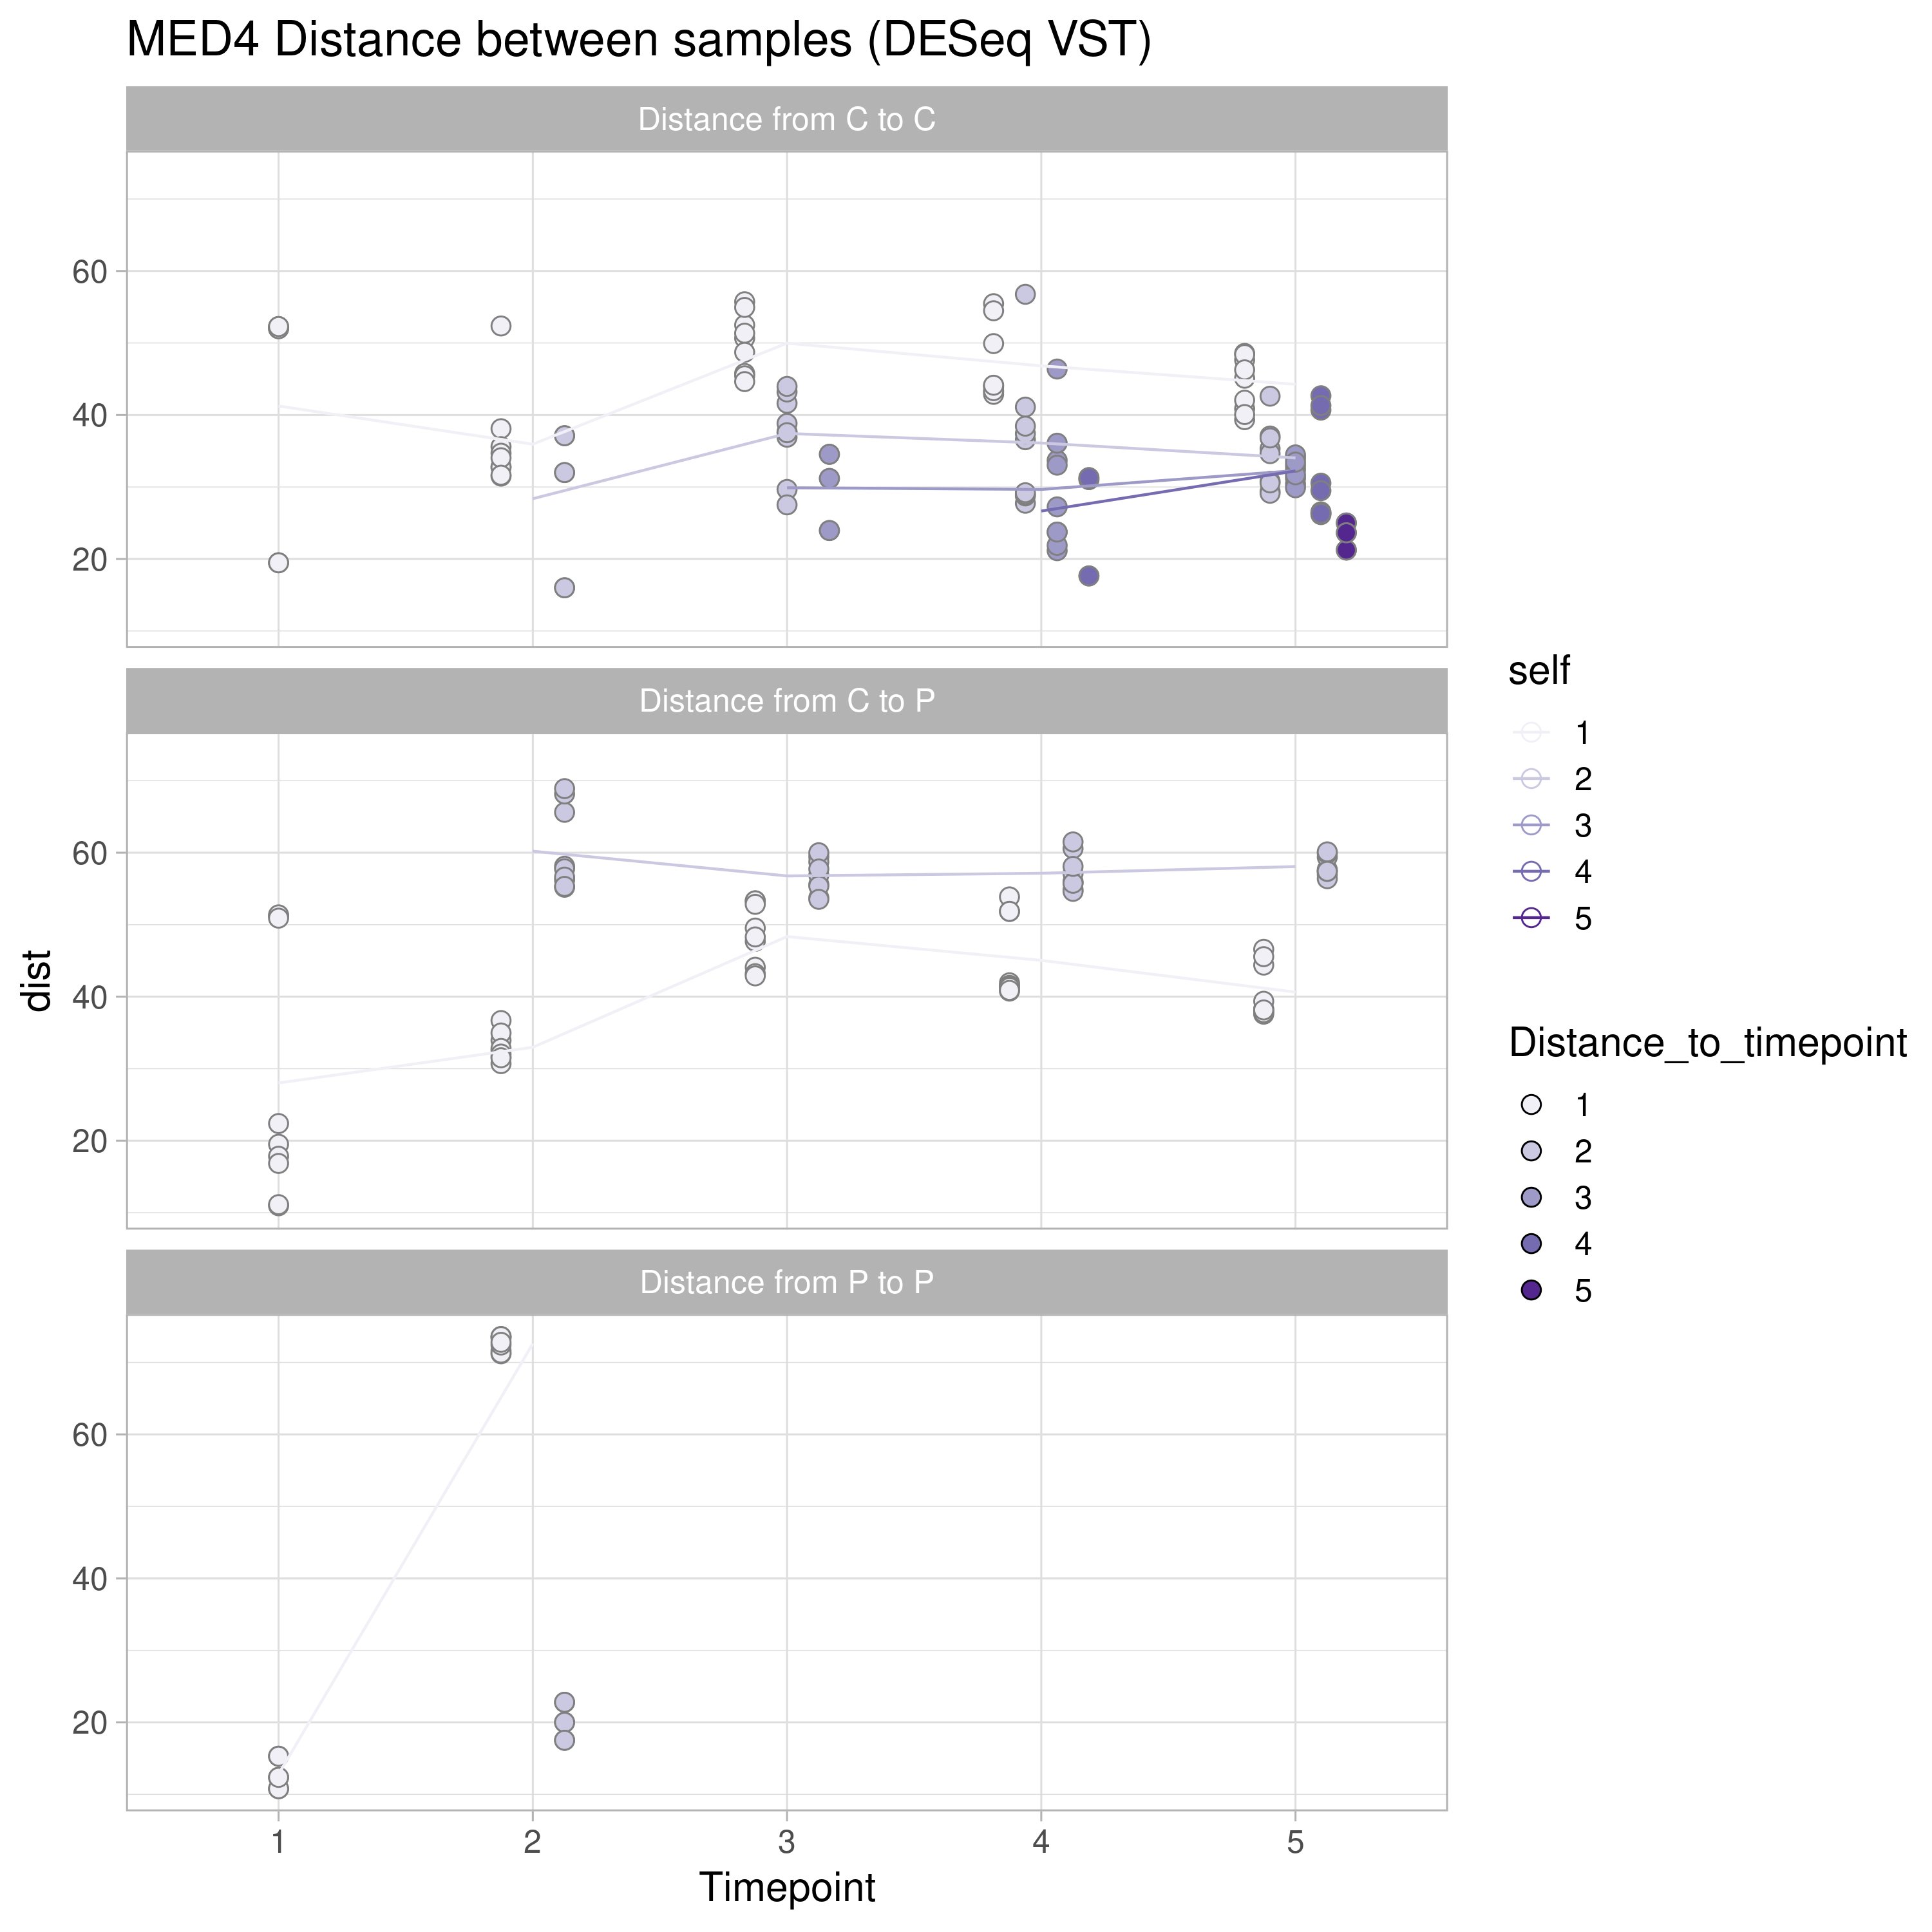

In [58]:
ggplot(mdist, aes(x=Timepoint, y=dist, fill=Distance_to_timepoint, 
                  color=self,
                  group=Distance_to_timepoint)) +
   geom_point(shape = 21, stroke = 0.5,
       position=position_dodge(width=0.5), #color='grey',
             size=3) +
   stat_summary(aes(color=Distance_to_timepoint), fun=mean, geom="line") +
   #geom_line(aes(group=Timepoint_2))
   #geom_boxplot(varwidth = TRUE) +
   scale_fill_manual(values = ann_colors$Timepoint) +
   scale_color_manual(values = ann_colors$Timepoint) +
   facet_wrap(~combgroup, ncol=1) +
  ggtitle("MED4 Distance between samples (DESeq VST)") +
  theme_light(base_size = 15)


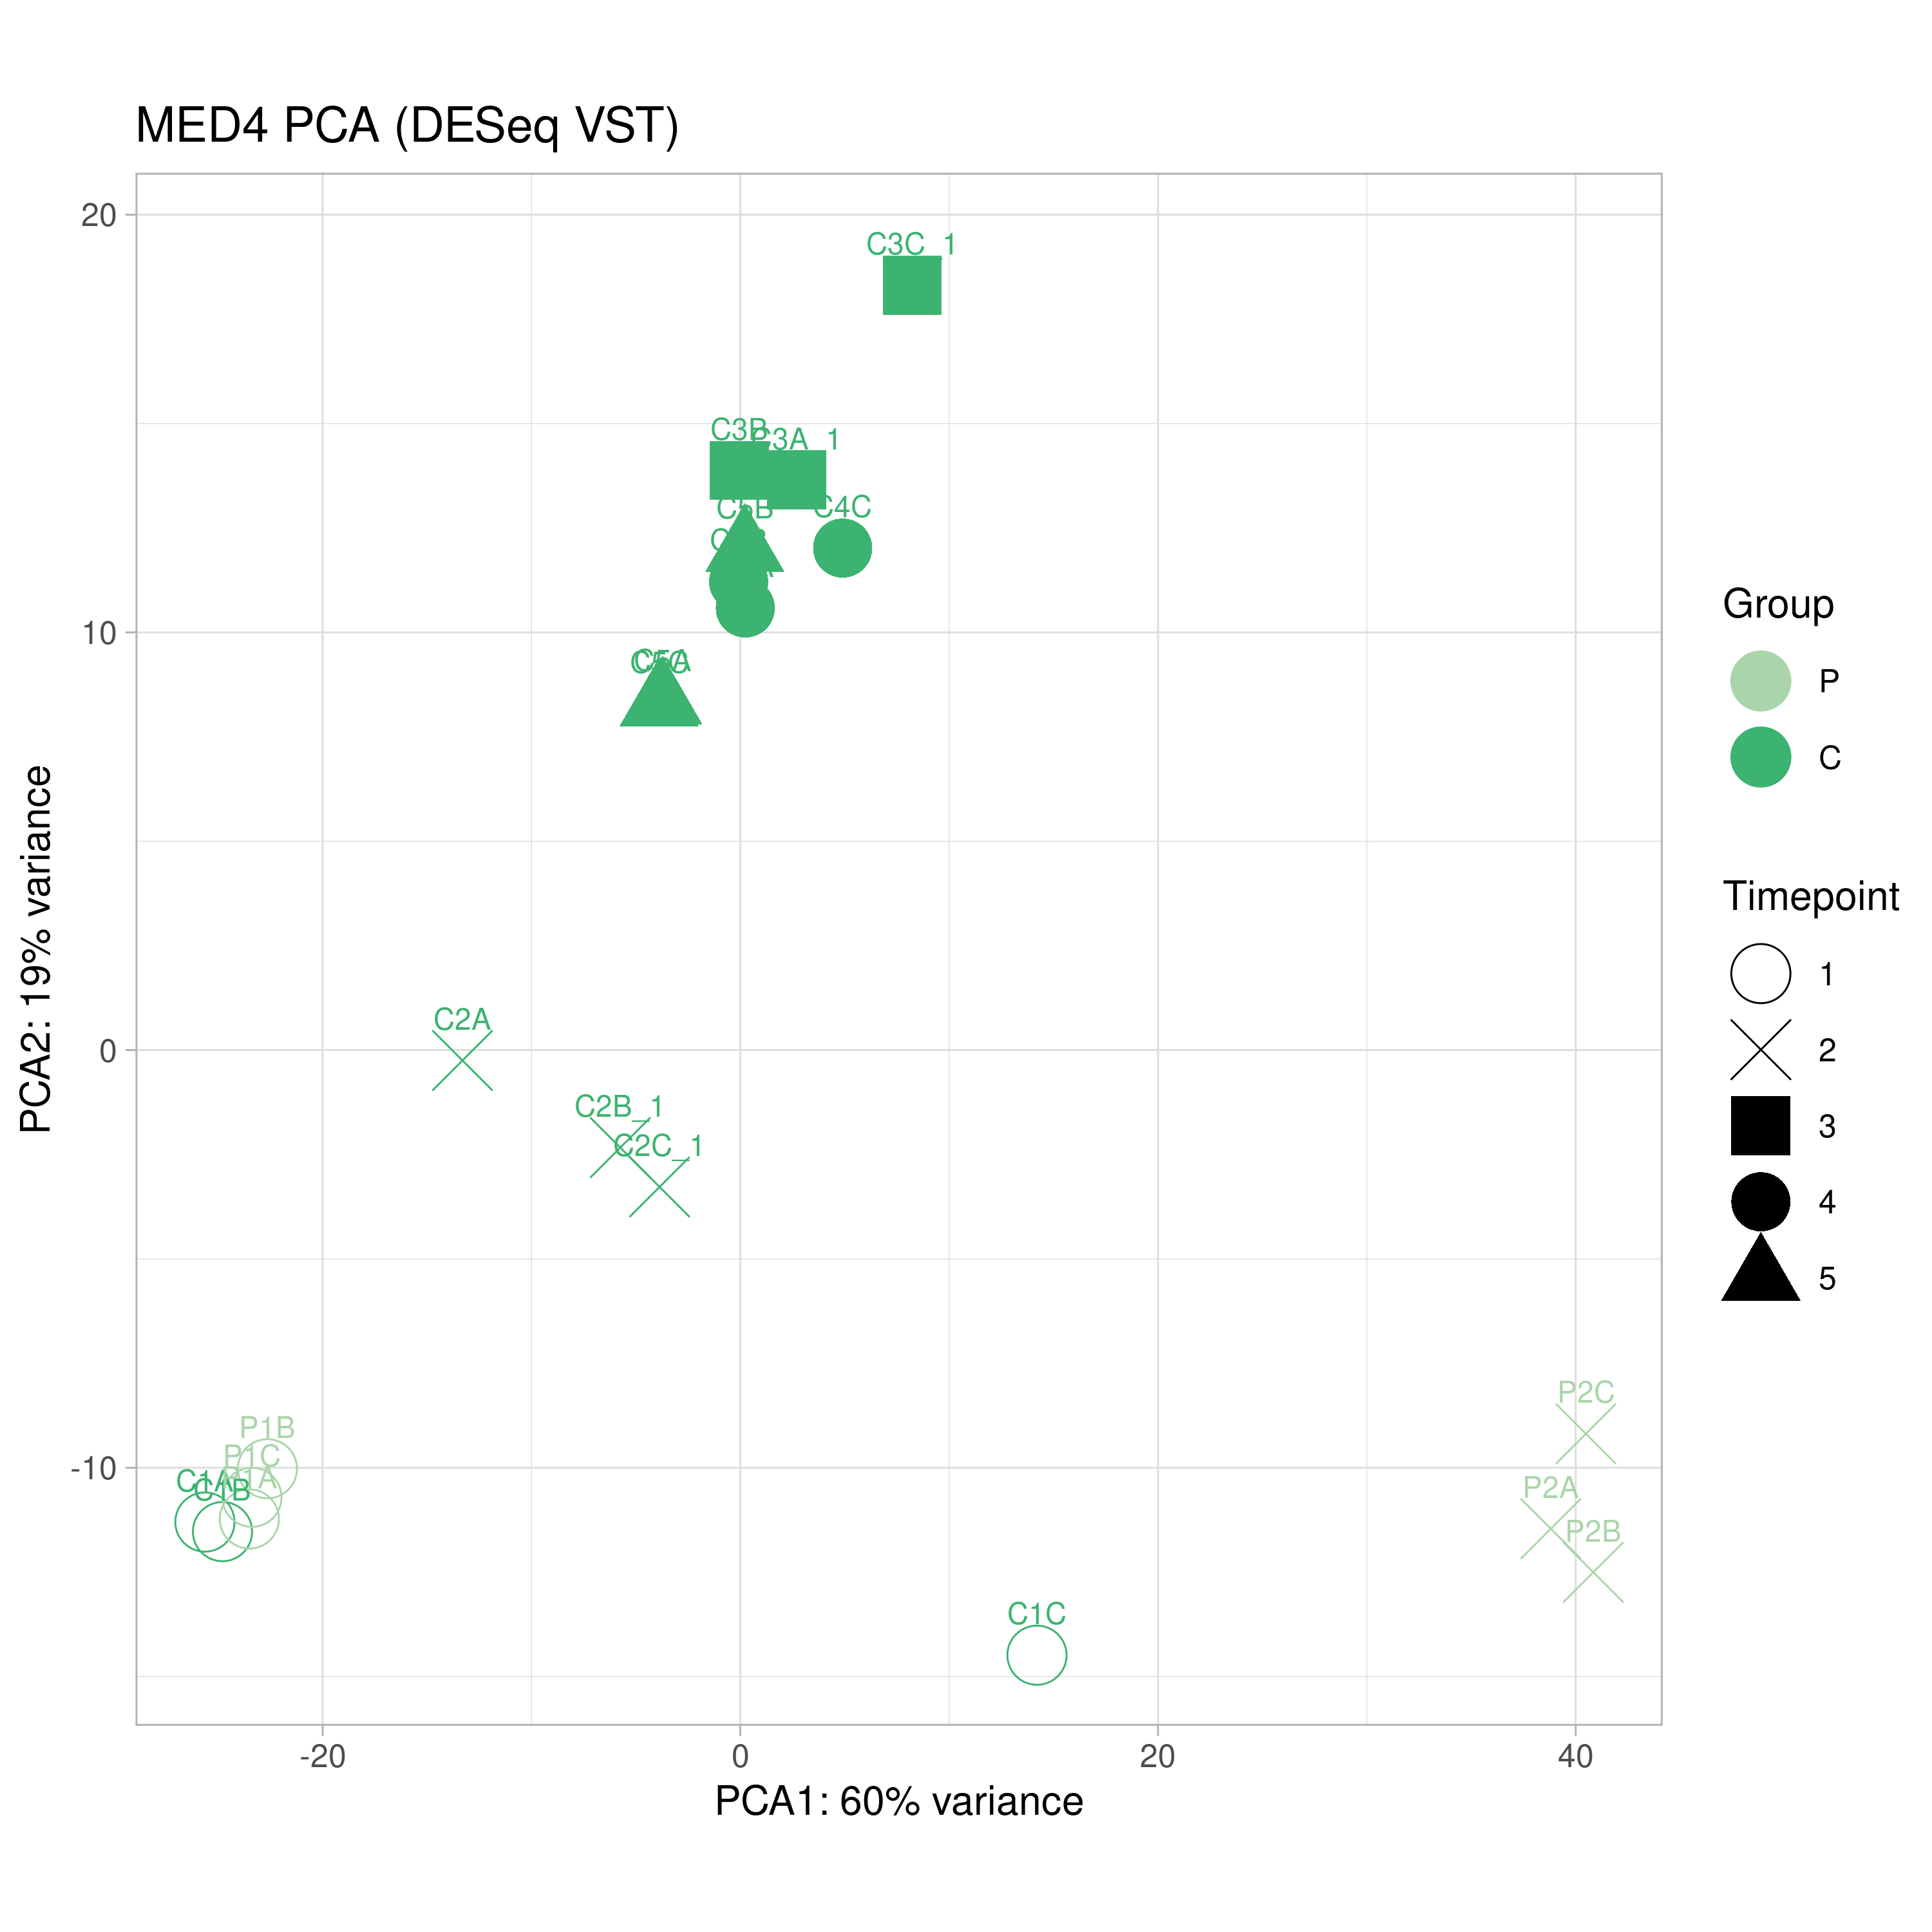

In [59]:
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
gpal = brewer.pal(4, 'Dark2')

ggplot(pcaData, aes(x = PC1, y = PC2, 
                    color = Group, shape = Timepoint, label=sample)) +
  geom_point(size =10) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  geom_text(nudge_y = 1) +
  scale_color_manual(values = ann_colors$Group) +
  scale_shape_manual(values=c(1, 4, 15, 16, 17))+
  ggtitle("MED4 PCA (DESeq VST)") +
  theme_light(base_size = 15)



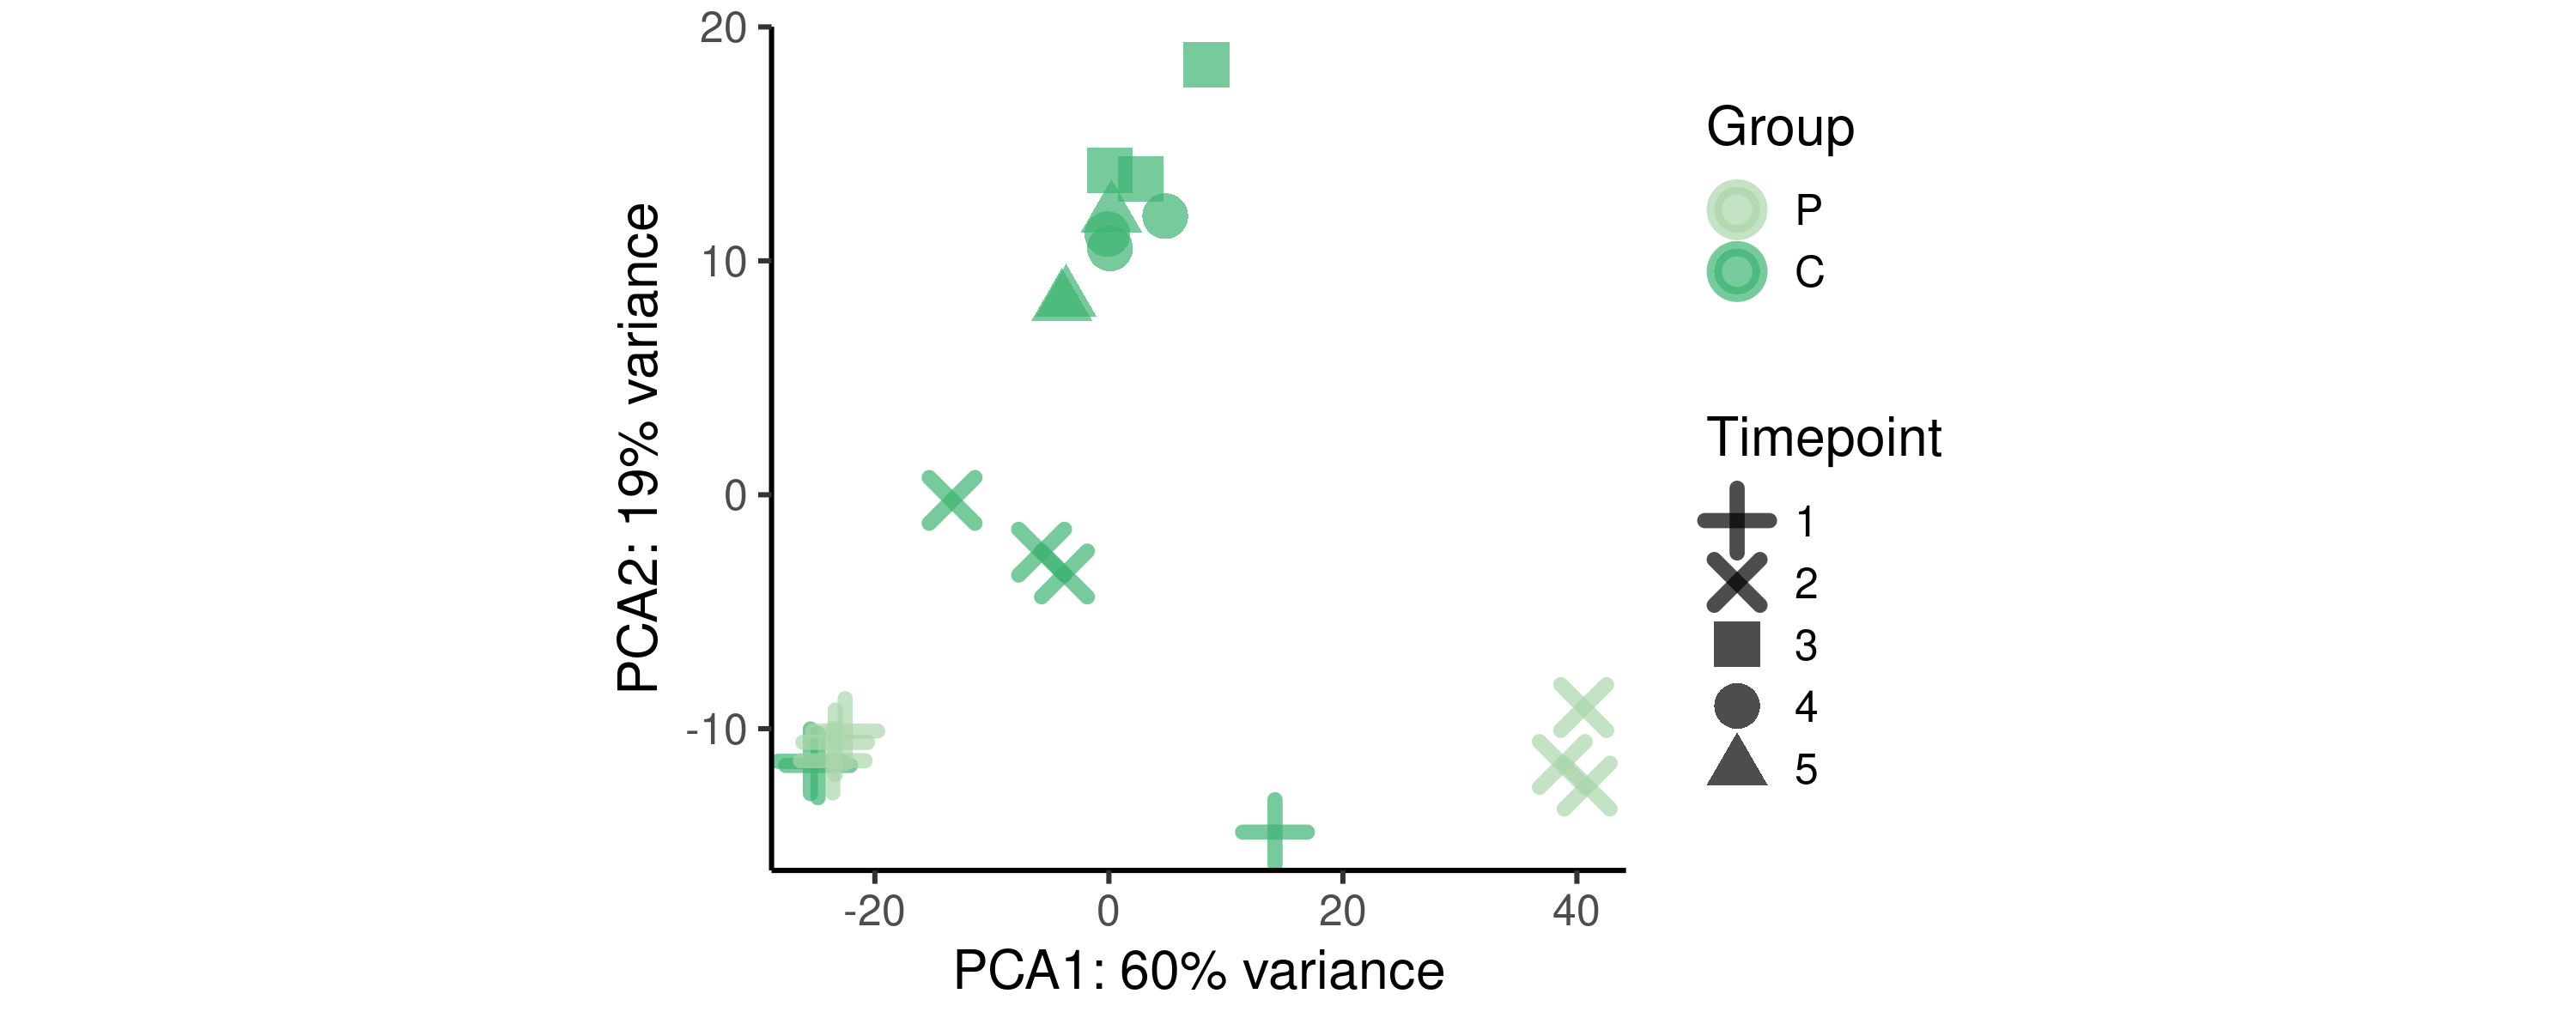

In [88]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 300)
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample', 'treatment'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
gpal = brewer.pal(4, 'Dark2')

ggplot(pcaData, aes(x = PC1,  y = PC2, 
                    color = Group, shape = Timepoint, label=sample)) +
  geom_point(size =4, stroke = 3, alpha=0.7, position=position_jitter(h=0.15,w=0.15)) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  #geom_text(nudge_y = 1) +
  scale_color_manual(values = ann_colors$Group) +
  scale_shape_manual(values=c(3,4, 15,16,17))+
  #ggtitle("1A3 PCA (DESeq VST)") +
  theme_classic(base_size = 15)  



In [60]:
assay(vsd)# [,c('C1', 'C2', 'C3', 'C4', 'C5')] #%>% select(starts_with('C')) # %>% rowSds() %>% hist()
#hist(rowSds(assay(vsd)))

,C1A,C1B,C1C,C2A,C2B_1,C2C_1,C3A_1,C3B,C3C_1,C4A,⋯,C4C,C5A,C5B,C5C,P1A,P1B,P1C,P2A,P2B,P2C
TX50_RS00020,10.199306,10.138608,11.552435,10.233089,10.846940,10.968598,10.277762,10.708205,10.925488,10.788772,⋯,10.673880,10.903510,10.828046,10.566447,10.145981,10.133392,9.980252,11.671632,12.075326,12.089237
TX50_RS00025,7.201485,7.403180,8.070099,7.613555,7.034628,7.294078,6.716129,6.561249,6.098862,6.959015,⋯,6.833144,7.123598,6.415651,7.179944,7.415239,6.965448,7.480714,7.102511,7.573653,7.703449
TX50_RS00030,8.599562,8.771120,10.002316,8.897714,8.846223,9.168677,9.715876,9.518070,9.788721,9.758011,⋯,10.293683,9.577001,9.988663,10.011130,8.774283,8.959921,8.768441,11.021224,11.593740,11.775872
TX50_RS00035,8.466332,8.538664,8.319138,8.517611,8.372679,8.572956,8.523269,8.581421,8.191762,8.752619,⋯,8.794819,8.502947,8.517462,8.733940,8.441880,8.775660,8.489322,9.186228,9.908075,10.219909
TX50_RS00040,9.316846,9.542356,10.613334,9.655292,10.014346,9.940660,9.331278,9.159758,9.212120,9.648415,⋯,9.543625,9.515104,9.410598,9.472152,9.356303,9.506277,9.259842,10.600202,10.181465,10.279694
TX50_RS00045,7.051232,6.830920,8.314047,7.850284,7.113894,7.198608,6.205762,7.496614,7.157745,7.534383,⋯,6.630732,7.045868,6.858691,6.946624,6.840204,6.424365,6.866480,8.181493,8.883846,8.507696
TX50_RS00050,7.290374,7.180581,9.022826,8.155148,8.027323,8.286385,8.576445,8.728353,9.030678,8.633386,⋯,8.966721,8.164532,8.134548,8.415303,7.126584,7.037307,7.336723,9.393630,9.588777,9.752545
TX50_RS00055,10.874508,10.269712,11.462462,9.692929,11.111961,11.334858,11.155128,11.450094,11.221289,10.988171,⋯,11.197964,10.889165,10.859164,10.691494,10.154281,10.558601,10.430667,10.896282,10.544279,10.895647
TX50_RS00060,7.511811,7.768824,8.475512,7.627780,7.475503,7.946936,7.907539,6.906372,7.349883,7.554001,⋯,6.517609,7.506472,6.654329,7.629933,7.621234,7.578901,7.566741,7.125462,7.209630,7.136205
TX50_RS00065,8.300663,8.011588,7.499263,7.599188,7.608964,7.401745,8.101511,8.008881,7.670865,8.065156,⋯,8.567706,7.435199,8.086769,8.005596,8.105516,8.200119,7.840141,7.019157,6.848277,7.028420


In [61]:
dds <- DESeq(dds)
res <- results(dds)
res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): groupandtime C5 vs P1 
Wald test p-value: groupandtime C5 vs P1 
DataFrame with 1855 rows and 6 columns
              baseMean log2FoldChange     lfcSE       stat     pvalue
             <numeric>      <numeric> <numeric>  <numeric>  <numeric>
TX50_RS00020  1911.213      0.6926892  0.327281  2.1164983 0.03430245
TX50_RS00025   129.727     -0.3801606  0.325336 -1.1685180 0.24259790
TX50_RS00030  1008.790      1.0602298  0.332614  3.1875719 0.00143473
TX50_RS00035   436.526      0.0132040  0.237415  0.0556156 0.95564807
TX50_RS00040   836.808      0.0917291  0.274039  0.3347296 0.73782907
...                ...            ...       ...        ...        ...
TX50_RS09870   34.4138      -0.720500  0.463838  -1.553345  0.1203408
TX50_RS09875   73.9437      -0.243154  0.522104  -0.465719  0.6414167
TX50_RS09880  139.8116      -0.310083  0.452462  -0.685323  0.4931402
TX50_RS09885  219.9974      -0.420775  0.238188  -1.766566  0.0773009
TX50_RS09890  163.0409      -0.7

In [62]:
s = summary(res)
s


out of 1855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 320, 17%
LFC < 0 (down)     : 334, 18%
outliers [1]       : 4, 0.22%
low counts [2]     : 0, 0%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



NULL

In [63]:
sum_dds <- function(name) {
    res = results(dds, name=name)
    sum = table(as.data.frame(res) %>% mutate(na_pvalue = is.na(pvalue),
               na_padj = is.na(padj),
               significant = padj < 0.1,
               direction = if_else(log2FoldChange > 0, 'up', 'down'),
               status = if_else(na_pvalue, 'outlier',
                                if_else(na_padj, 'lowcount', 
                                        if_else(significant, direction, 'no_significant'
                                        
                               )))
               ) %>% select(status))
    #sum = cbind(sum, name=name)
    return(sum)
    }


In [64]:
get_dds <- function(name) {
    res = results(dds, name=name)
    res = as.data.frame(res) %>% 
       mutate(
           contrast = name,
           na_pvalue = is.na(pvalue),
           na_padj = is.na(padj),
           significant = padj < 0.1,
           direction = if_else(log2FoldChange > 0, 'up', 'down'),
           status = if_else(na_pvalue, 'outlier',
                            if_else(na_padj, 'lowcount', 
                                    if_else(significant, direction, 'no_significant'
                                           )))
       ) 
    return(res)
}


In [65]:
results_names = resultsNames(dds)

In [66]:
#bind_rows(
sum_df = lapply(results_names, sum_dds) %>% bind_rows 

sum_df$name = results_names
sum_df


no_significant,outlier,up,down,lowcount,name
<table>,<table>,<table>,<table>,<table>,<chr>
11,4,1840,NA,NA,Intercept
616,4,613,622,NA,groupandtime_P2_vs_P1
1212,4,58,5,576,groupandtime_C1_vs_P1
1471,4,136,136,108,groupandtime_C2_vs_P1
1026,4,405,420,NA,groupandtime_C3_vs_P1
1040,4,393,418,NA,groupandtime_C4_vs_P1
1197,4,320,334,NA,groupandtime_C5_vs_P1


In [67]:
#bind_rows(
res_df = lapply(results_names, get_dds) %>% 
  bind_rows %>%
  rownames_to_column(var = 'gene_id') 

write_csv(res_df, file.path('DE_results','MED4_DE_DESEQ_results.csv'))


In [68]:
sum_df = sum_df %>% 
   filter(name != 'Intercept') %>% 
   mutate(tot_fc = up + down, 
         name = str_remove(name, 'groupandtime_'))

In [69]:
sum_df

no_significant,outlier,up,down,lowcount,name,tot_fc
<table>,<table>,<table>,<table>,<table>,<chr>,<table>
616,4,613,622,NA,P2_vs_P1,1235
1212,4,58,5,576,C1_vs_P1,63
1471,4,136,136,108,C2_vs_P1,272
1026,4,405,420,NA,C3_vs_P1,825
1040,4,393,418,NA,C4_vs_P1,811
1197,4,320,334,NA,C5_vs_P1,654


In [70]:
write.csv(as.data.frame(assay(vsd)), 
          file.path('DE_results','MED4_DE_DESEQ_vsd.csv'))

In [71]:
dds@design

~groupandtime

In [72]:
summary(results(dds, name='groupandtime_C1_vs_P1'
        ))


out of 1855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 58, 3.1%
LFC < 0 (down)     : 5, 0.27%
outliers [1]       : 4, 0.22%
low counts [2]     : 576, 31%
(mean count < 121)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [73]:
resLFC <- lfcShrink(dds, coef="groupandtime_C1_vs_P1", type="apeglm")
resLFC

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



log2 fold change (MAP): groupandtime C1 vs P1 
Wald test p-value: groupandtime C1 vs P1 
DataFrame with 1855 rows and 5 columns
              baseMean log2FoldChange     lfcSE    pvalue      padj
             <numeric>      <numeric> <numeric> <numeric> <numeric>
TX50_RS00020  1911.213      0.2414386  0.348998 0.0298892  0.246574
TX50_RS00025   129.727      0.0787654  0.163660 0.2753804  0.614904
TX50_RS00030  1008.790      0.0970347  0.178259 0.1778183  0.540220
TX50_RS00035   436.526     -0.0466888  0.138338 0.5508460  0.786482
TX50_RS00040   836.808      0.2687215  0.302299 0.0333955  0.259630
...                ...            ...       ...       ...       ...
TX50_RS09870   34.4138     -0.0470259  0.158787  0.414172        NA
TX50_RS09875   73.9437      0.0316129  0.158293  0.513528        NA
TX50_RS09880  139.8116      0.0272153  0.154778  0.604982  0.817976
TX50_RS09885  219.9974     -0.0294866  0.131493  0.725802  0.895005
TX50_RS09890  163.0409     -0.0450428  0.152639  0.48891

In [74]:
resOrdered <- res[order(res$pvalue),]

In [75]:
summary(resLFC)


out of 1855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 58, 3.1%
LFC < 0 (down)     : 5, 0.27%
outliers [1]       : 4, 0.22%
low counts [2]     : 576, 31%
(mean count < 121)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [76]:
summary(res)


out of 1855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 320, 17%
LFC < 0 (down)     : 334, 18%
outliers [1]       : 4, 0.22%
low counts [2]     : 0, 0%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [77]:
sum(res$padj < 0.1, na.rm=TRUE)

[1] 654

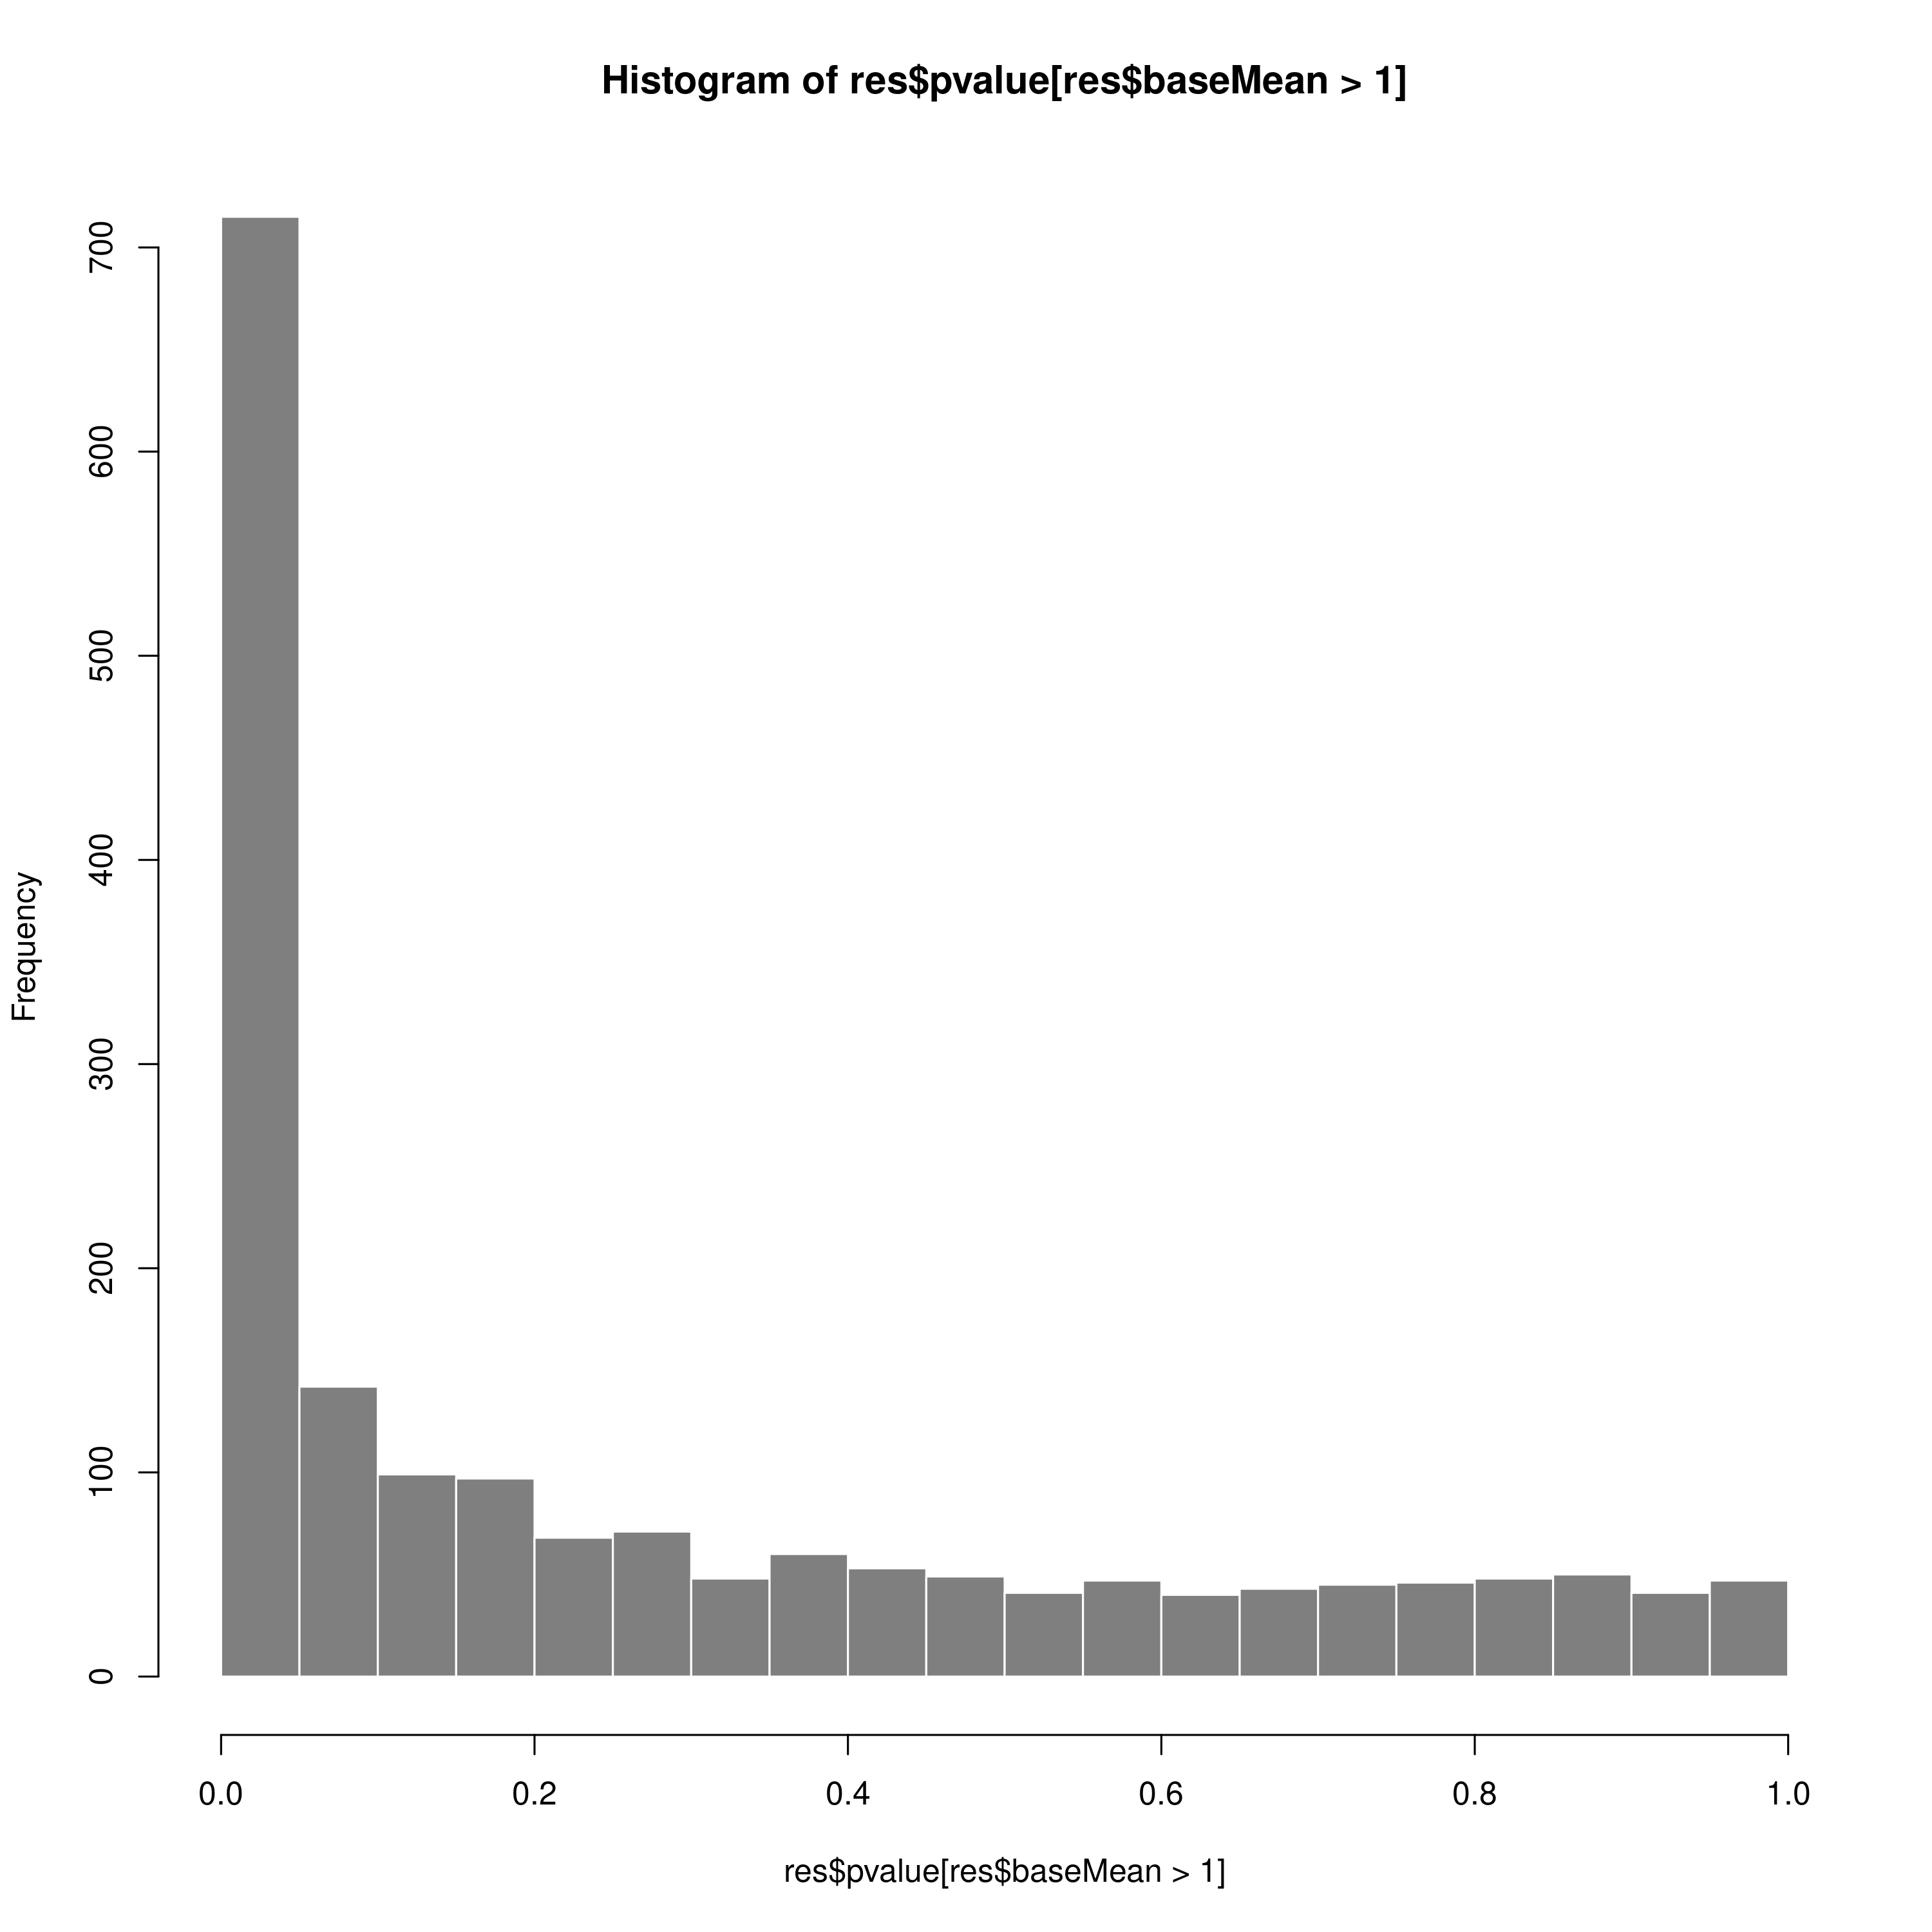

In [78]:
hist(res$pvalue[res$baseMean > 1], breaks = 0:20/20,
     col = "grey50", border = "white")

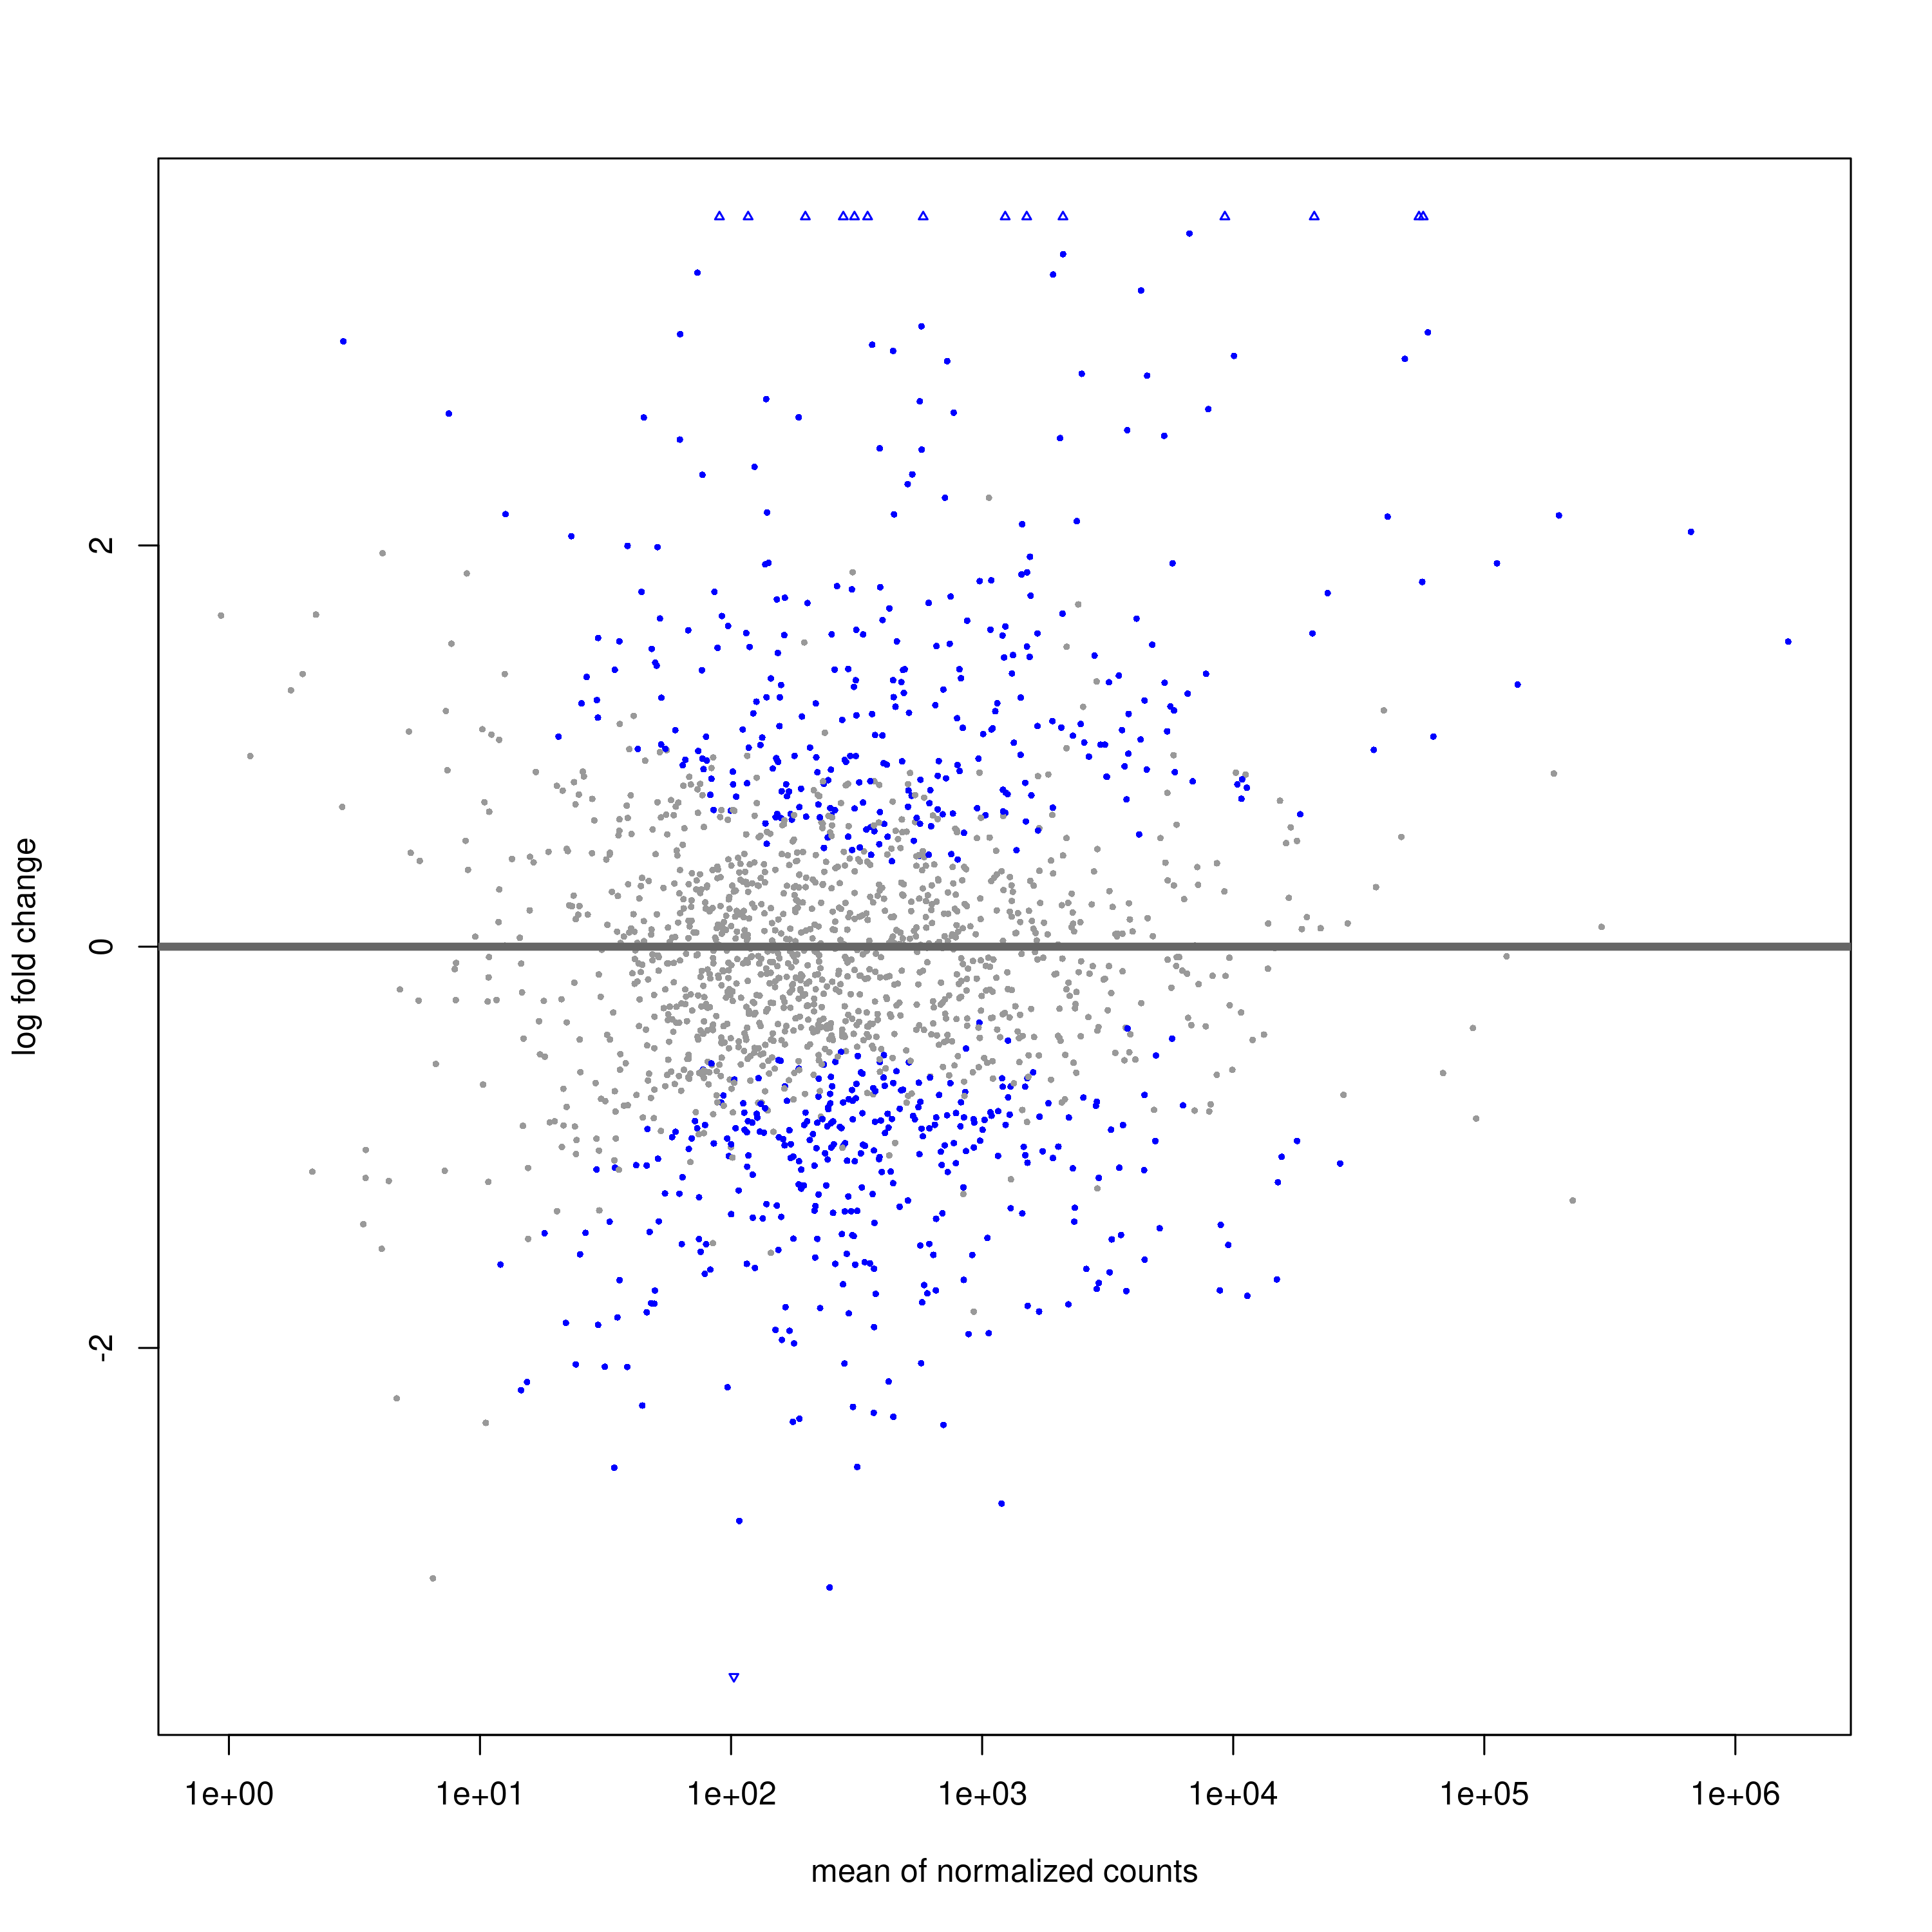

In [79]:
plotMA(res, #ylim=c(-2,2)
      )

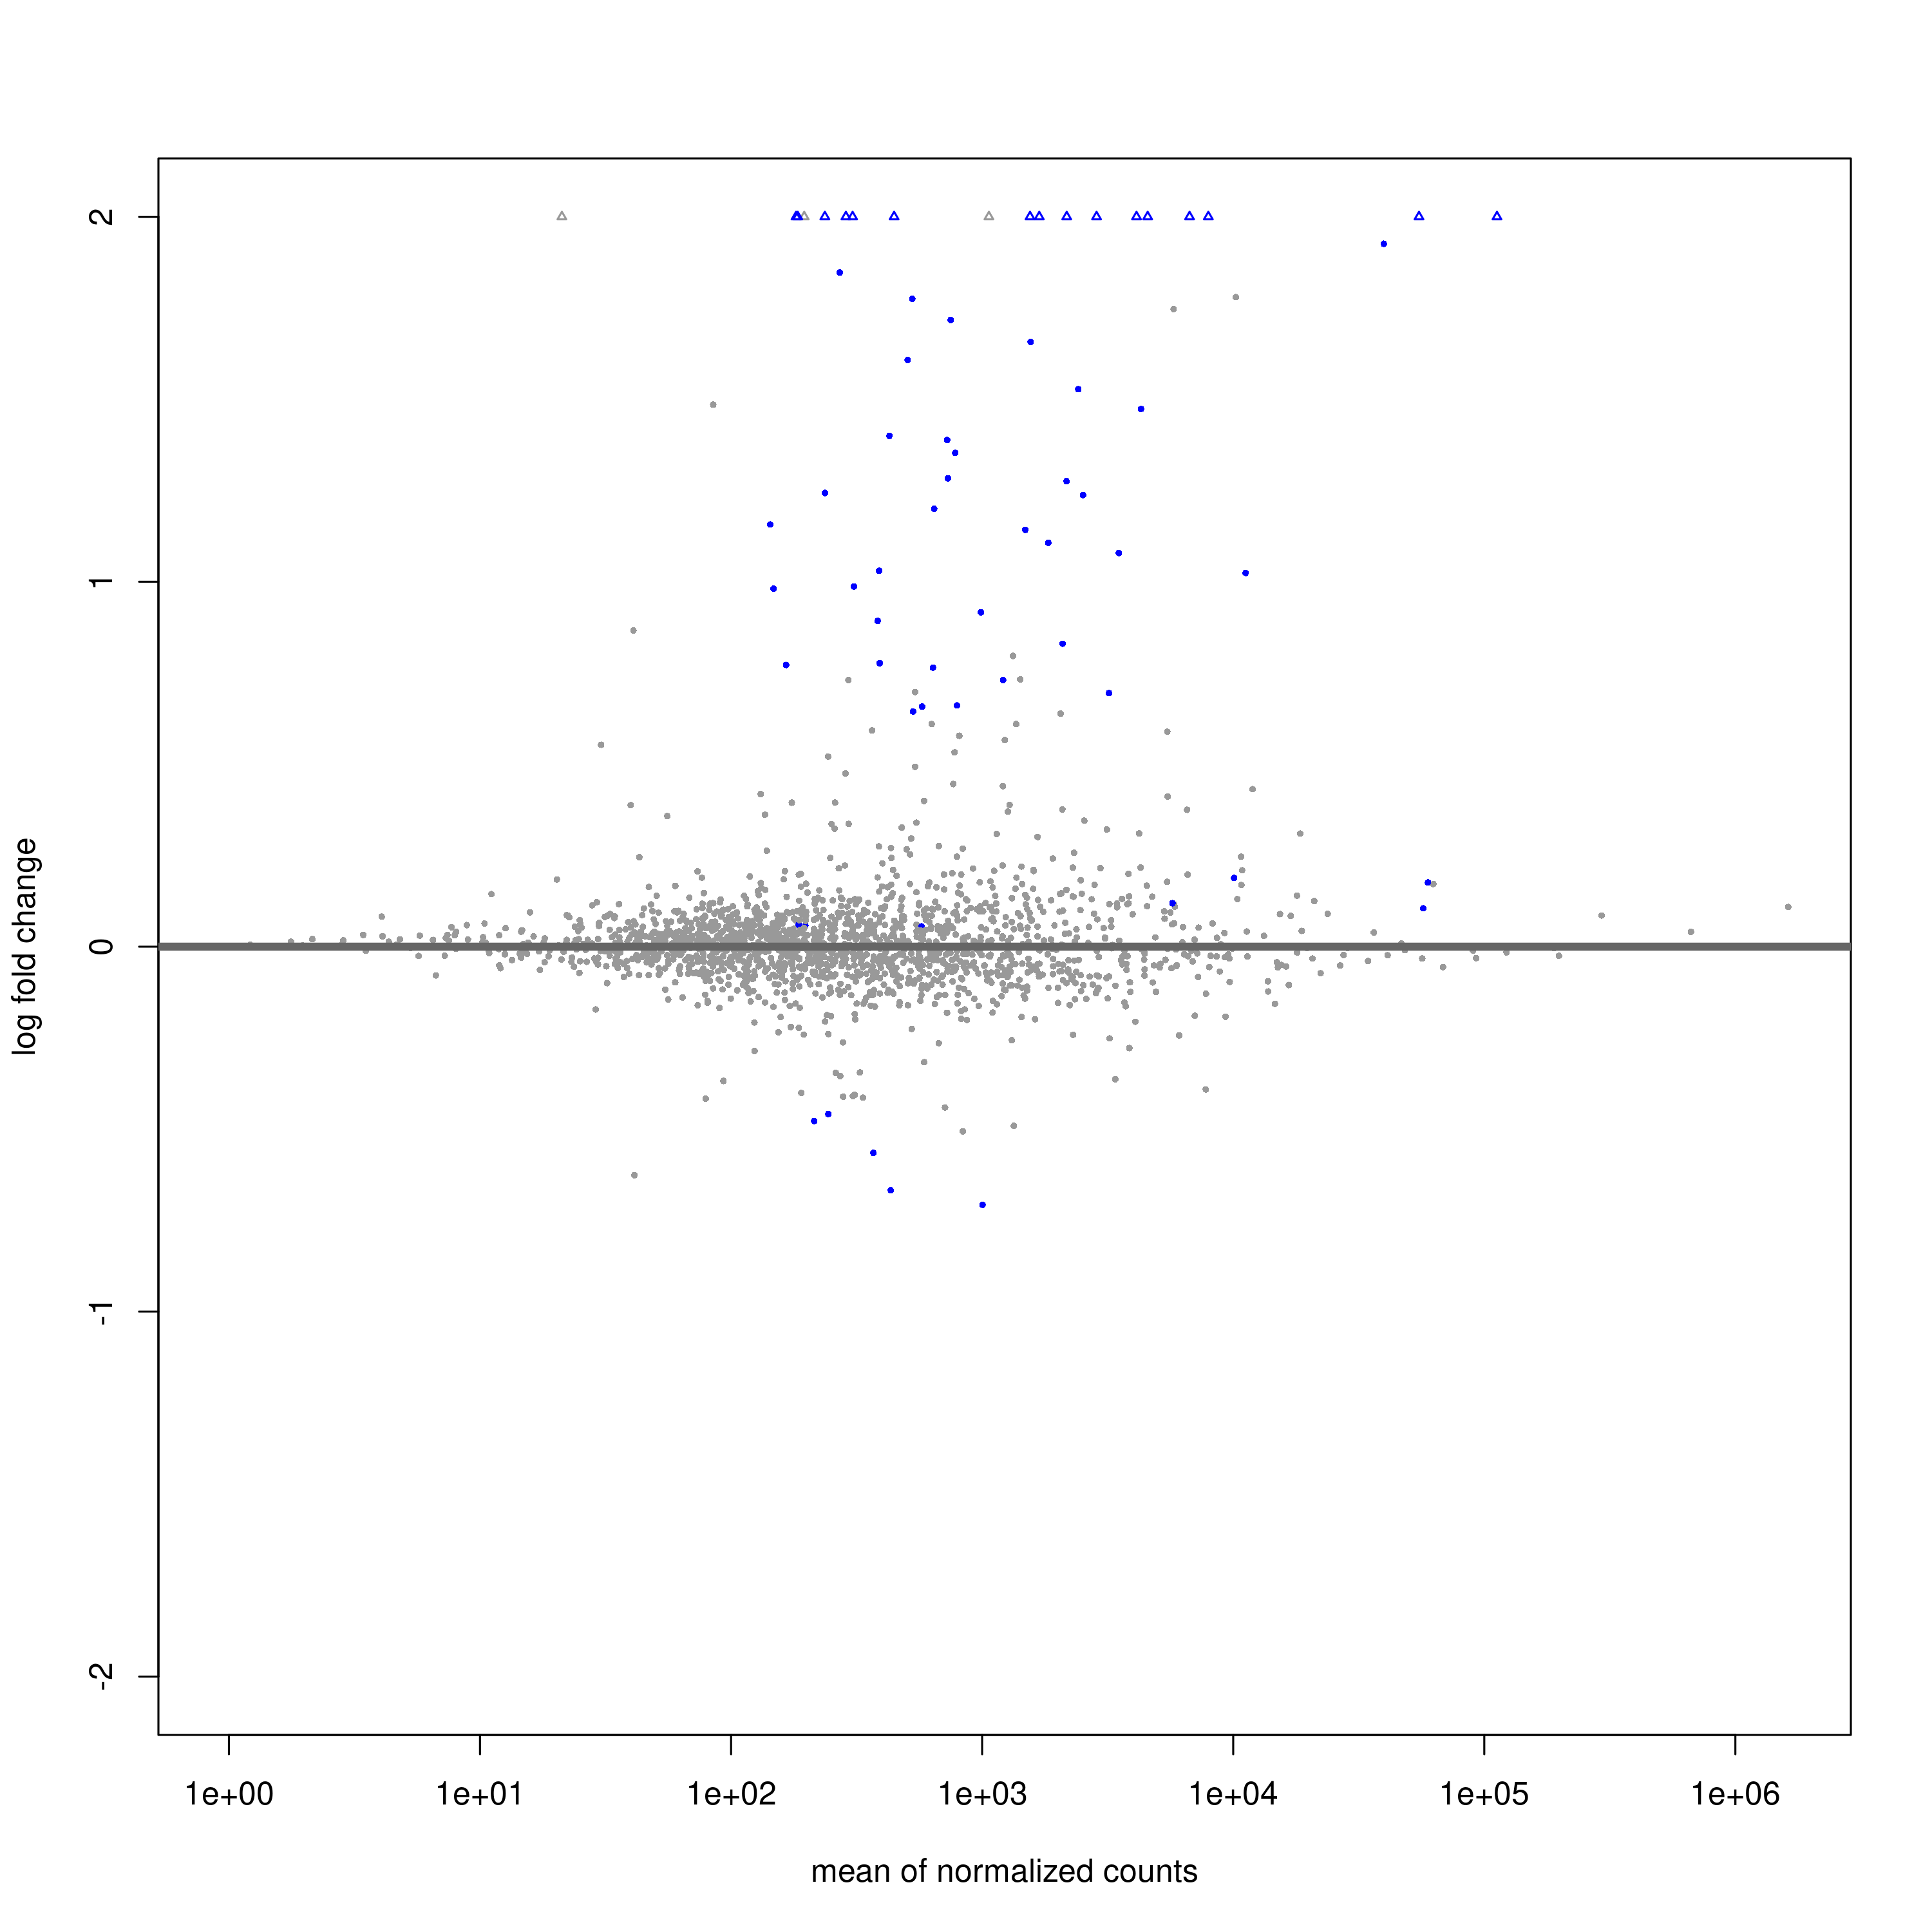

In [80]:
plotMA(resLFC, ylim=c(-2,2))

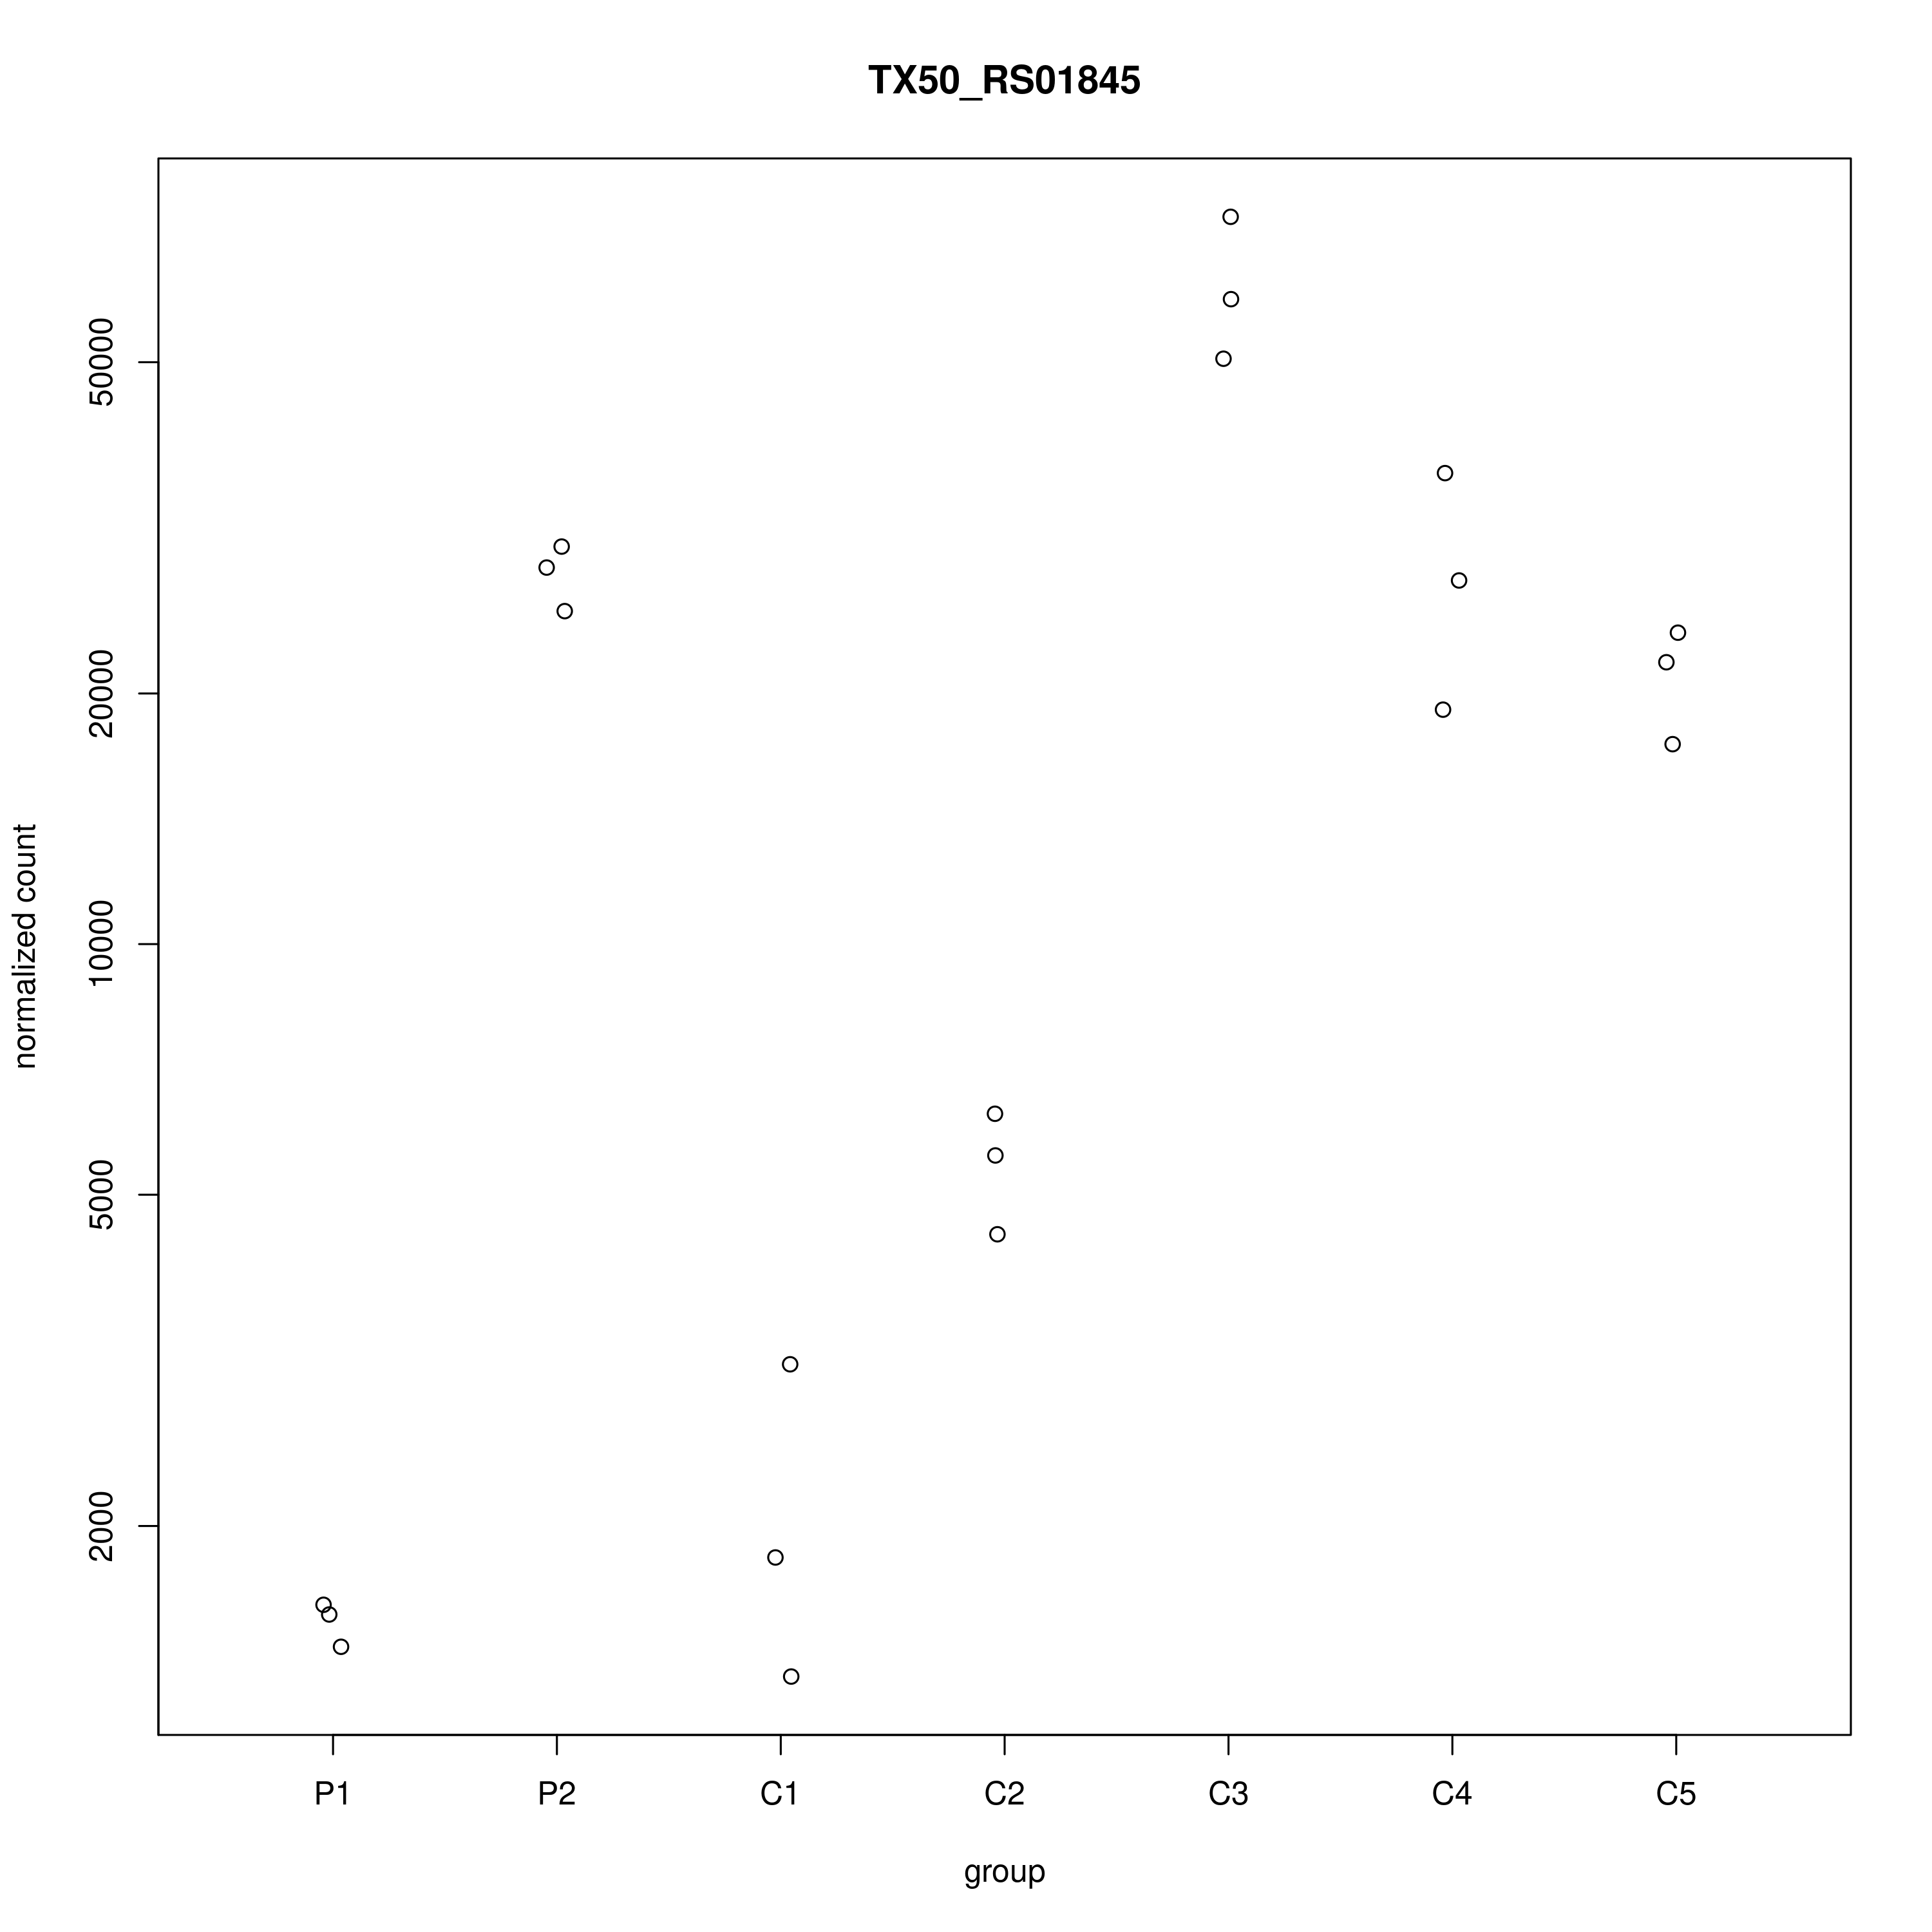

In [81]:
plotCounts(dds, gene=which.min(res$padj), intgroup="groupandtime")

In [82]:
which.min(res$padj)

[1] 349

In [83]:
genes[349,]

,gene_id,gene,product,protein_id,old_locus_tag
,<chr>,<chr>,<chr>,<chr>,<lgl>
TX50_RS01845,TX50_RS01845,,hypothetical protein,WP_225866761.1,NA


In [84]:
t(counts(dds)[(rowSums(counts(dds) >= 10) < 3),])

,TX50_RS01920,TX50_RS02775,TX50_RS03835,TX50_RS04835,TX50_RS05495,TX50_RS06065,TX50_RS07590,TX50_RS08720,TX50_RS09435
C1A,8,2,0,2,0,0,1,2,0
C1B,2,1,1,10,17,13,3,6,2
C1C,5,5,5,4,1,3,4,6,2
C2A,0,3,1,6,1,0,2,1,0
C2B_1,4,1,0,1,2,2,2,3,2
C2C_1,1,6,0,4,0,0,6,0,2
C3A_1,0,0,0,1,1,0,1,0,1
C3B,2,0,1,4,2,1,4,2,0
C3C_1,1,4,0,18,1,0,0,1,0
C4A,0,0,0,1,1,4,3,0,1


In [85]:
genes[(rowSums(counts(dds) >= 10) < 3),]

,gene_id,gene,product,protein_id,old_locus_tag
,<chr>,<chr>,<chr>,<chr>,<lgl>
TX50_RS01920,TX50_RS01920,,hypothetical protein,WP_036930928.1,NA
TX50_RS02775,TX50_RS02775,,hypothetical protein,WP_011132152.1,NA
TX50_RS03835,TX50_RS03835,,helix-turn-helix domain-containing protein,WP_011132352.1,NA
TX50_RS04810,TX50_RS04810,,ATP phosphoribosyltransferase regulatory subunit,WP_011132533.1,NA
TX50_RS05470,TX50_RS05470,,Nif11 family protein,WP_011132653.1,NA
TX50_RS06025,TX50_RS06025,,HupE/UreJ family protein,WP_011132756.1,NA
TX50_RS07540,TX50_RS07540,,hypothetical protein,WP_011133031.1,NA
TX50_RS08670,TX50_RS08670,mreC,rod shape-determining protein MreC,WP_011133248.1,NA
TX50_RS09370,TX50_RS09370,,DUF3721 domain-containing protein,WP_011133050.1,NA
